# Script thesis Brandon Bastiaans

# 1 Loading dataset

In [1]:
# Import basic packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing neighbourhood statistics file.
rawdf = pd.read_excel (r'C:\Users\brand\Desktop\School\WUR\thesis\data\neighbourhood_statistics_thesis.xlsx')
print(rawdf.shape)
print(rawdf.info())

(4730, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4730 entries, 0 to 4729
Data columns (total 35 columns):
gwb_code_10    4730 non-null object
regio          4730 non-null object
gm_naam        4730 non-null object
a_inw          4730 non-null int64
g_gas          4413 non-null float64
g_ele          4539 non-null float64
p_00_14        4730 non-null float64
p_15_24        4730 non-null float64
p_25_44        4730 non-null float64
p_45_64        4730 non-null float64
p_65_oo        4730 non-null float64
p_w_all        4730 non-null float64
p_nw_all       4730 non-null float64
g_hhgro        4716 non-null float64
bev_dich       4656 non-null float64
g_woz          4310 non-null float64
p_mgezw        4516 non-null float64
p_leegsw       4516 non-null float64
p_koopw        4511 non-null float64
p_wcorpw       4511 non-null float64
g_ink_po       4412 non-null float64
p_soz_ww       4536 non-null float64
p_wat          4730 non-null float64
g_bjaar        4730 non-null int64
p

# 2 Cleaning Dataset

In [3]:
# Import seaborn.
import seaborn 

In [4]:
# replace NULL values in the file with numpy NaN values.
rawdf.replace('NULL', np.NaN)

gwb_code_10                        regio      gm_naam  a_inw   g_gas  \
0     BU00140000             Binnenstad-Noord    Groningen   4440  1250.0   
1     BU00140001              Binnenstad-Zuid    Groningen   6600  1240.0   
2     BU00140002              Binnenstad-Oost    Groningen   3920  1050.0   
3     BU00140003              Binnenstad-West    Groningen   1765  1420.0   
4     BU00140005  Hortusbuurt-Ebbingekwartier    Groningen   5510  1000.0   
...          ...                          ...          ...    ...     ...   
4725  BU19480430                Veghel Zuid 1  Meierijstad   1355  1420.0   
4726  BU19480431                Veghel Zuid 2  Meierijstad   1990  1170.0   
4727  BU19480432                   Vijverwijk  Meierijstad    420  2470.0   
4728  BU19550200                   Didam-Zuid  Montferland   5150  1450.0   
4729  BU19550201                  Didam-Noord  Montferland   7050  1480.0   

       g_ele    p_00_14    p_15_24    p_25_44    p_45_64  ...  p_app  p_tussw  \
0     2460.0   2.818489  47.012401  33.370913  11.273957  ...  44.40    51.20   
1     2170.0   2.651515  47.045455  32.727273  11.212121  ...  54.19    38.39   
2     2110.0   3.065134  40.996169  34.865900  14.048531  ...  45.87    43.17   
3     2130.0   2.549575  39.376771  38.810198  10.764873  ...  40.94    50.88   
4     2100.0   4.718693  41.833031  30.399274  14.700544  ...  33.23    54.13   
...      ...        ...        ...        ...        ...  ...    ...      ...   
4725  2830.0  13.235294   9.558824  18.014706  25.735294  ...   0.00    58.49   
4726  2850.0  18.090452  10.804020  26.381910  25.376884  ...   0.13    69.64   
4727  3900.0  13.953488  12.790698  16.279070  29.069767  ...   1.67    17.78   
4728  3040.0  12.900097  11.348206  18.137730  32.686712  ...   2.61    29.46   
4729  3110.0  15.155807  10.906516  19.617564  29.886686  ...   0.85    37.32   

      p_2o1kap  p_hoek  p_vrijstd  p_slim_m   FSI/FAR       GSI  type_stad  \
0         0.00    4.20       0.20      60.7  1.685000  0.516000          3   
1         0.95    5.21       1.26      50.4  1.523000  0.478000          3   
2         1.27    9.05       0.63      60.0  1.412000  0.379000          3   
3         0.00    7.02       1.17      65.4  1.718000  0.495000          3   
4         0.96   11.04       0.64      57.4  2.235000  0.721000          3   
...        ...     ...        ...       ...       ...       ...        ...   
4725      7.31   24.28       9.92      20.8  0.104703  0.050805          2   
4726      1.76   28.48       0.00      33.5  0.138517  0.067462          2   
4727     18.89   15.00      46.67      18.2  0.091148  0.041974          2   
4728     23.82   21.31      22.80      84.1  0.378000  0.249000          1   
4729     15.41   26.55      19.87      86.8  0.393000  0.214000          1   

      ste_mvs  
0           1  
1           1  
2           1  
3           1  
4           1  
...       ...  
4725        2  
4726        3  
4727        3  
4728        3  
4729        3  

[4730 rows x 35 columns]

In [5]:
# Count up all the NaN values.
rawdf.shape[0] - rawdf.dropna().shape[0]

572

In [6]:
# counting neighbourhoods with density under 1500 per km2 for df with NaN values
only_na1500 = rawdf.loc[rawdf['bev_dich'] < 1500]
only_na1500.shape[0]

498

In [7]:
# Dropping all NaN values.
df1 = rawdf.dropna()

In [8]:
# counting neighbourhoods with density under 1500 per km2 for df without NaN values
only_na1500_2 = df1.loc[df1['bev_dich'] < 1500]
only_na1500_2.shape[0]

232

In [9]:
# Count up all the NaN values to see if NaN rows were dropped.
print(df1.shape[0])
df1.shape[0] - df1.dropna().shape[0]

4158


0

In [10]:
# Resetting the index of df1.
df1.reset_index(drop=True, inplace=True)

In [11]:
# Identifying the minimum value for the population density, so that only urban areas are included in the study. 
# This is because the degree of urbanity variable (ste_mvs) is based on the density of addresses,
# which also includes unhabited buildings, like businesses.
# ste_mvs <= 3 were already selected in excel.
# First the distribution of bev_dich is checked.
df1['bev_dich'].describe()

count     4158.000000
mean      6461.494468
std       4378.136376
min         92.000000
25%       3800.250000
50%       5589.000000
75%       7971.750000
max      35720.000000
Name: bev_dich, dtype: float64

In [12]:
# European Comission minimum population density for urban centres is 1500 per km2.
# This seems like a high treshold, but check first to see how many neighbourhoods will be excluded,
# because 75% of the neighbourhoods have more than 3857 inhabitants per km2.
df1['gwb_code_10'][(df1['bev_dich']<1500)].count()
# Only 232 neighbourhoods will be removed with a treshold of 1500, so this is a good minimum density for urban areas.

232

In [13]:
# Drop neighbourhoods with a population density < 1500.
print(df1.shape[0])
cleandf = df1.drop(df1[df1['bev_dich'] < 1500].index)

4158


In [14]:
# Check if the neighbourhoods were successfully dropped.
print(cleandf.shape[0])
cleandf['gwb_code_10'][(cleandf['bev_dich']<1500)].count()

3926


0

In [15]:
# Resetting the index of cleandf.
cleandf.reset_index(drop=True, inplace=True)

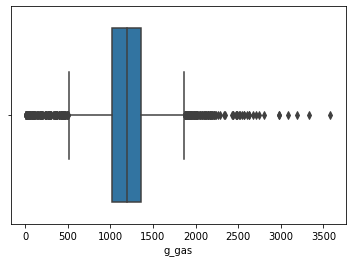

In [16]:
# Check variables (which aren't percentual) for a possible presence of outliers.
# average gas use:
seaborn.boxplot(x=cleandf['g_gas'])

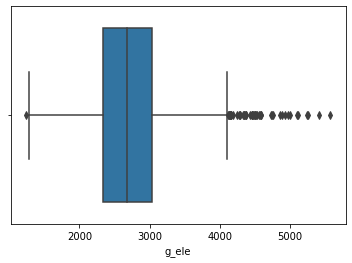

In [17]:
# avarage electricity use:
seaborn.boxplot(x=cleandf['g_ele'])

In [18]:
# Removing outliers.
# Every value above the 99% threshold and below the 1% threshold will be removed.
# g_gas has a lot of extreme outliers so thresholds were set to 5% and 95%.
for col in cleandf[['g_gas', 'g_ele']]:
    if(col == 'g_gas'):
        percentiles = cleandf[col].quantile([0.05,0.95]).values
        cleandf = cleandf[cleandf[col] >= percentiles[0]]
        cleandf = cleandf[cleandf[col] <= percentiles[1]]
    else:
        percentiles = cleandf[col].quantile([0.01,0.99]).values
        cleandf = cleandf[cleandf[col] >= percentiles[0]]
        cleandf = cleandf[cleandf[col] <= percentiles[1]]

In [19]:
# Check the amount of rows that are left over. 
cleandf.shape

(3468, 35)

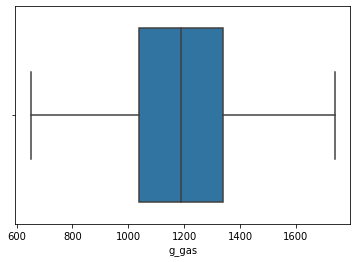

In [20]:
# Check variables to see if outliers were removed.
seaborn.boxplot(x=cleandf['g_gas'])

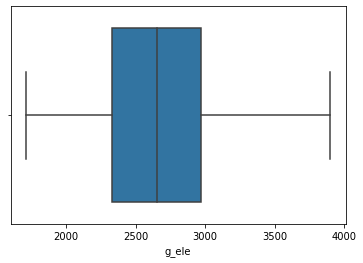

In [21]:
seaborn.boxplot(x=cleandf['g_ele'])

In [22]:
# Resetting the index of cleandf.
cleandf.reset_index(drop=True, inplace=True)

# 3 Collinearity analysis

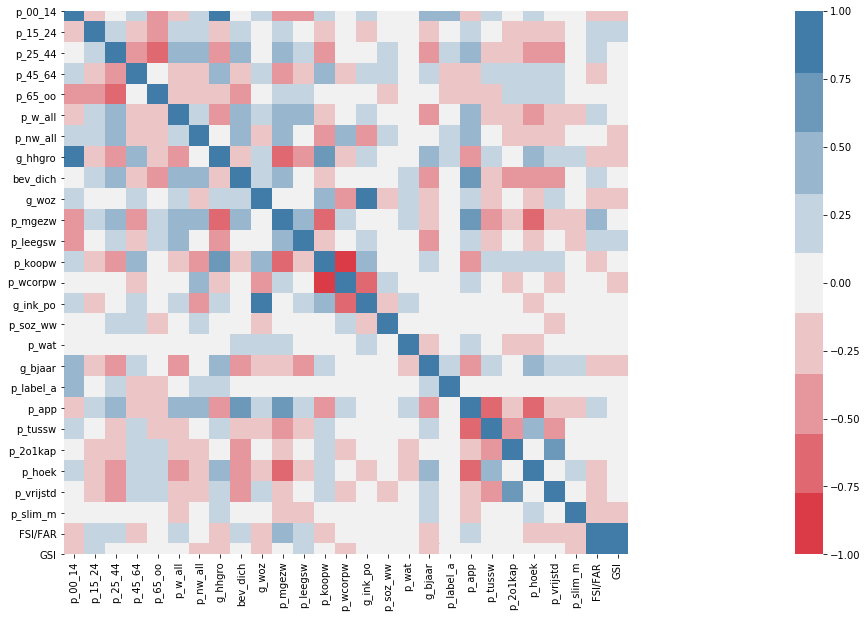

In [23]:
# Make a selection of all independent variables
indep_var = cleandf.iloc[:, 6:33]

# Look at correlation table
corr = indep_var.corr()
plt.figure(figsize=(60,10))
ax = seaborn.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=seaborn.diverging_palette(10, 240, n=9),
    square=True
)

In [24]:
# Show VIF values
df_cor = indep_var.corr()
vifs = pd.Series(np.linalg.inv(indep_var.corr().values).diagonal(), index=df_cor.index)
print(vifs)

p_00_14      3.984004e+13
p_15_24      4.189494e+13
p_25_44      9.478753e+13
p_45_64      5.011533e+13
p_65_oo      1.608047e+14
p_w_all      1.786082e+00
p_nw_all     3.079956e+00
g_hhgro      1.095764e+01
bev_dich     2.507516e+00
g_woz        7.321351e+00
p_mgezw      6.531292e+00
p_leegsw     1.875523e+00
p_koopw      9.446070e+00
p_wcorpw     7.120103e+00
g_ink_po     9.237455e+00
p_soz_ww     1.458957e+00
p_wat        1.144464e+00
g_bjaar      2.306271e+00
p_label_a    1.667132e+00
p_app        1.410090e+07
p_tussw      9.831346e+06
p_2o1kap     2.325259e+06
p_hoek       1.788703e+06
p_vrijstd    1.791944e+06
p_slim_m     1.088217e+00
FSI/FAR      4.059694e+00
GSI          3.706137e+00
dtype: float64


In [25]:
# First remove collinear features.
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset
            elif (corr_matrix.iloc[i, j] <= (threshold*-1)) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset
    print(dataset)

In [26]:
# Remove collinear features with a threshold of 0.7
correlation(indep_var,0.7)

        p_00_14    p_15_24    p_25_44    p_45_64    p_65_oo    p_w_all  \
0      2.818489  47.012401  33.370913  11.273957   5.524239  16.103604   
1      2.651515  47.045455  32.727273  11.212121   6.363636  15.606061   
2      3.065134  40.996169  34.865900  14.048531   7.024266  15.688776   
3      2.549575  39.376771  38.810198  10.764873   8.498584  18.413598   
4      4.718693  41.833031  30.399274  14.700544   8.348457  16.333938   
...         ...        ...        ...        ...        ...        ...   
3463   7.707911   8.722110  22.312373  21.298174  39.959432  11.178862   
3464  13.235294   9.558824  18.014706  25.735294  33.455882  11.439114   
3465  18.090452  10.804020  26.381910  25.376884  19.346734  13.567839   
3466  12.900097  11.348206  18.137730  32.686712  24.927255   7.184466   
3467  15.155807  10.906516  19.617564  29.886686  24.433428   6.312057   

       p_nw_all  bev_dich  g_woz  p_mgezw  ...  p_soz_ww     p_wat  g_bjaar  \
0      9.684685   11974.0  163.0

In [27]:
# Check remaining VIF values.
# Only high values are left in the 'age' categories.
df_cor = indep_var.corr()
vifs = pd.Series(np.linalg.inv(indep_var.corr().values).diagonal(), index=df_cor.index)
print(vifs)

p_00_14      3.984004e+13
p_15_24      4.189494e+13
p_25_44      9.478753e+13
p_45_64      5.011533e+13
p_65_oo      1.608047e+14
p_w_all      1.615242e+00
p_nw_all     2.801405e+00
bev_dich     2.447853e+00
g_woz        1.971763e+00
p_mgezw      5.076889e+00
p_leegsw     1.669625e+00
p_koopw      2.712272e+00
p_soz_ww     1.430706e+00
p_wat        1.140789e+00
g_bjaar      2.123444e+00
p_label_a    1.635590e+00
p_tussw      2.813915e+00
p_2o1kap     2.311046e+00
p_hoek       2.515250e+00
p_vrijstd    2.304009e+00
p_slim_m     1.085369e+00
FSI/FAR      1.416569e+00
dtype: float64


In [28]:
# Remove p_65_oo, because it has the highest VIF value.
indep_var = indep_var.drop(['p_65_oo'], axis=1)

In [29]:
# Check VIF values again.
df_cor = indep_var.corr()
vifs = pd.Series(np.linalg.inv(indep_var.corr().values).diagonal(), index=df_cor.index)
print(vifs)

p_00_14      3.008054
p_15_24      1.405276
p_25_44      2.728941
p_45_64      2.493747
p_w_all      1.615242
p_nw_all     2.801405
bev_dich     2.447853
g_woz        1.971763
p_mgezw      5.076889
p_leegsw     1.669625
p_koopw      2.712272
p_soz_ww     1.430706
p_wat        1.140789
g_bjaar      2.123444
p_label_a    1.635590
p_tussw      2.813915
p_2o1kap     2.311046
p_hoek       2.515250
p_vrijstd    2.304009
p_slim_m     1.085369
FSI/FAR      1.416569
dtype: float64


In [30]:
# Make a dataset for RF.
# dataset = cleaned df, remove = columns not to be removed.  
def finalData (dataset, notremove):
    notremoveset = notremove.columns.tolist()
    notremoveset.insert(0,'g_gas')
    notremoveset.insert(0,'g_ele')
    notremoveset.insert(0,'type_stad')
    notremoveset.insert(0,'gm_naam')
    finaldf = dataset[notremoveset]
    return finaldf

# Use finalData function to prepare dataset for RF Model.
finalDF = finalData(cleandf, indep_var)
finalDF.columns.tolist()

['gm_naam',
 'type_stad',
 'g_ele',
 'g_gas',
 'p_00_14',
 'p_15_24',
 'p_25_44',
 'p_45_64',
 'p_w_all',
 'p_nw_all',
 'bev_dich',
 'g_woz',
 'p_mgezw',
 'p_leegsw',
 'p_koopw',
 'p_soz_ww',
 'p_wat',
 'g_bjaar',
 'p_label_a',
 'p_tussw',
 'p_2o1kap',
 'p_hoek',
 'p_vrijstd',
 'p_slim_m',
 'FSI/FAR']

# 4 Analyse Hyperparameters with Cross Validation

In [31]:
# Import necessary packages.
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

In [32]:
# Set parameter ranges for random grid.
# Number of trees in random forest.
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 100)]
# Number of features to consider at every split.
max_features = ['auto']
# Maximum number of levels in tree.
max_depth = [int(x) for x in np.linspace(5, 60, num = 13)]
max_depth.append(None)
# Minimum number of samples required to split a node.
min_samples_split = [int(x) for x in np.linspace(2, 10, num = 5)]
# Minimum number of samples required at each leaf node.
min_samples_leaf = [int(x) for x in np.linspace(2, 10, num = 5)]
# Method of selecting samples for training each tree.
bootstrap = [True]

# Create the random grid.
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True],
 'max_depth': [5, 9, 14, 18, 23, 27, 32, 37, 41, 46, 50, 55, 60, None],
 'max_features': ['auto'],
 'min_samples_leaf': [2, 4, 6, 8, 10],
 'min_samples_split': [2, 4, 6, 8, 10],
 'n_estimators': [50,
                  69,
                  89,
                  109,
                  128,
                  148,
                  168,
                  187,
                  207,
                  227,
                  246,
                  266,
                  286,
                  306,
                  325,
                  345,
                  365,
                  384,
                  404,
                  424,
                  443,
                  463,
                  483,
                  503,
                  522,
                  542,
                  562,
                  581,
                  601,
                  621,
                  640,
                  660,
                  680,
                  700,
                  719

In [33]:
# Function for selecting best hyperparameters.
def hyperparam (dataset, random_grid):
    
    # Divide data into attributes and labels.
    X = dataset.iloc[:, 4:].values
    y_gas = np.array(dataset.iloc[:, 3].values)
    y_ele = np.array(dataset.iloc[:, 2].values)

    # Split the data into training and testing sets.
    train_features_gas, test_features_gas, train_labels_gas, test_labels_gas = train_test_split(X, y_gas, test_size = 0.25, random_state = 42)
    train_features_ele, test_features_ele, train_labels_ele, test_labels_ele = train_test_split(X, y_ele, test_size = 0.25, random_state = 42)

    # Set random_state.
    rf = RandomForestRegressor(random_state = 42)

    # Random search of parameters, using 3 fold cross validation. 
    # Search across 100 different combinations, and use all available cores.
    rf_random = RandomizedSearchCV(estimator = rf, param_distributions =random_grid, n_iter = 100, cv = 3, verbose=2, n_jobs = -1)

    # Fit the random search model
    rf_random.fit(train_features_gas, train_labels_gas);
    gas_params = rf_random.best_params_
    
    rf_random.fit(train_features_ele, train_labels_ele);
    ele_params = rf_random.best_params_
    
    # Instantiate model with best parameters
    rf_gas = RandomForestRegressor(n_estimators = gas_params['n_estimators'], max_depth = gas_params['max_depth'], min_samples_split = gas_params['min_samples_split'], min_samples_leaf = gas_params['min_samples_leaf'], max_features = 0.33, bootstrap = gas_params['bootstrap'], oob_score = True, random_state = 42)
    rf_ele = RandomForestRegressor(n_estimators = ele_params['n_estimators'], max_depth = ele_params['max_depth'], min_samples_split = ele_params['min_samples_split'], min_samples_leaf = ele_params['min_samples_leaf'], max_features = 0.33, bootstrap = ele_params['bootstrap'], oob_score = True, random_state = 42)
    
    return train_features_gas, test_features_gas, train_labels_gas, test_labels_gas, rf_gas, train_features_ele, test_features_ele, train_labels_ele, test_labels_ele, rf_ele

# 5 Train and validate the model for full dataset

In [34]:
# Import necessary packages.
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import spearmanr, pearsonr
from sklearn.inspection import permutation_importance

In [35]:
# Use function for dataset splitting and finding best hyperparameters.
train_features_gas, test_features_gas, train_labels_gas, test_labels_gas, rf_gas, train_features_ele, test_features_ele, train_labels_ele, test_labels_ele, rf_ele = hyperparam(finalDF, random_grid)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits


In [36]:
# Check the distribution between test and train data. 
print('Training Features Shape (Gas):', train_features_gas.shape)
print('Training Labels Shape (Gas):', train_labels_gas.shape)
print('Testing Features Shape (Gas):', test_features_gas.shape)
print('Testing Labels Shape (Gas):', test_labels_gas.shape)

print('Training Features Shape (Electricity):', train_features_ele.shape)
print('Training Labels Shape (Electricity):', train_labels_ele.shape)
print('Testing Features Shape (Electricity):', test_features_ele.shape)
print('Testing Labels Shape (Electricity):', test_labels_ele.shape)

Training Features Shape (Gas): (2601, 21)
Training Labels Shape (Gas): (2601,)
Testing Features Shape (Gas): (867, 21)
Testing Labels Shape (Gas): (867,)
Training Features Shape (Electricity): (2601, 21)
Training Labels Shape (Electricity): (2601,)
Testing Features Shape (Electricity): (867, 21)
Testing Labels Shape (Electricity): (867,)


In [37]:
# Train the models using the best hyperparameters.
rf_gas.fit(train_features_gas, train_labels_gas);
rf_ele.fit(train_features_ele, train_labels_ele);

In [38]:
# Use the forest's predict method on the test data.
gas_predictions = rf_gas.predict(test_features_gas)
ele_predictions = rf_ele.predict(test_features_ele)

In [39]:
# Import packages.
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# Function for validating the model.
def validate (rf, prediction, test_labels, name):
    
    print(name)
    # Print out the mean absolute error (MAE).
    mae = mean_absolute_error(test_labels, prediction)
    # Calculate mean absolute percentage error (MAPE).
    mape = mean_absolute_percentage_error(test_labels, prediction)*100
    # Calculate and display accuracy.
    accuracy = 100 - mape
    
    avrg = np.mean(test_labels)

    r2_val = r2_score(test_labels, prediction)
    #spearman = spearmanr(test_labels, prediction)
    #pearson = pearsonr(test_labels, prediction)
    rmse = mean_squared_error(test_labels, prediction, squared=False)
    oob = rf.oob_score_
    
    
    output = name,'MEAN:',round(avrg,2),'MAE:',round(mae,2),'MAPE:',round(mape,2),'RMSE:',round(rmse,2),'R2 validation set:',round(r2_val,2),'OOB R2:',round(oob,2)
    
    return output

In [40]:
# Getting accuracy scores and correlation coefficients for gas
gas_validate = validate(rf_gas, gas_predictions, test_labels_gas, 'Validation scores for total dataset (gas)')
gas_validate

Validation scores for total dataset (gas)


('Validation scores for total dataset (gas)',
 'MEAN:',
 1200.57,
 'MAE:',
 91.91,
 'MAPE:',
 8.06,
 'RMSE:',
 126.55,
 'R2 validation set:',
 0.64,
 'OOB R2:',
 0.68)

In [41]:
# Getting accuracy scores and correlation coefficients for electricity
ele_validate = validate(rf_ele, ele_predictions, test_labels_ele, 'Validation scores for total dataset (electricity)')
ele_validate

Validation scores for total dataset (electricity)


('Validation scores for total dataset (electricity)',
 'MEAN:',
 2660.65,
 'MAE:',
 162.44,
 'MAPE:',
 6.27,
 'RMSE:',
 216.34,
 'R2 validation set:',
 0.76,
 'OOB R2:',
 0.79)

In [42]:
# Permutation importance fuction.
def permutation (df, rf, train_features, train_labels, name):
    permutation = permutation_importance(rf, train_features, train_labels, n_repeats=10, random_state=0)
    data = df.iloc[:, 4:]
    for i in permutation.importances_mean.argsort()[::-1]:
        print(f"{data.columns[i]:<8}"
                  f"{permutation.importances_mean[i]:.3f}"
                  f" +/- {permutation.importances_std[i]:.3f}")
    
    perm_dict = {"name": name}
    
    for i in permutation.importances_mean.argsort()[::-1]:
            perm_dict[str(data.columns[i])] = permutation.importances_mean[i]
    
    df2 = pd.DataFrame(perm_dict, index=[0])
    df2 = df2.set_index('name') 
                  
    return df2

In [43]:
# Calculate permutation importance scores for gas.
perm_gas = permutation(finalDF, rf_gas, train_features_gas, train_labels_gas, 'total_gas')

p_mgezw 0.323 +/- 0.009
g_bjaar 0.267 +/- 0.009
p_koopw 0.147 +/- 0.004
p_nw_all0.086 +/- 0.002
p_tussw 0.064 +/- 0.002
p_2o1kap0.056 +/- 0.002
p_vrijstd0.052 +/- 0.003
p_label_a0.050 +/- 0.001
p_25_44 0.046 +/- 0.001
g_woz   0.037 +/- 0.001
bev_dich0.035 +/- 0.001
p_00_14 0.031 +/- 0.001
p_hoek  0.030 +/- 0.001
p_45_64 0.024 +/- 0.001
p_w_all 0.019 +/- 0.000
p_15_24 0.019 +/- 0.000
FSI/FAR 0.018 +/- 0.000
p_slim_m0.015 +/- 0.000
p_soz_ww0.014 +/- 0.000
p_wat   0.011 +/- 0.000
p_leegsw0.010 +/- 0.000


In [44]:
# Calculate permutation importance scores for electricity.
perm_ele = permutation(finalDF, rf_ele, train_features_ele, train_labels_ele, 'total_ele')

p_koopw 0.264 +/- 0.004
p_mgezw 0.252 +/- 0.005
g_woz   0.109 +/- 0.003
g_bjaar 0.077 +/- 0.002
p_25_44 0.049 +/- 0.002
p_45_64 0.042 +/- 0.001
p_00_14 0.029 +/- 0.001
p_vrijstd0.022 +/- 0.001
p_hoek  0.019 +/- 0.000
p_15_24 0.018 +/- 0.001
p_tussw 0.017 +/- 0.000
p_nw_all0.016 +/- 0.000
p_w_all 0.015 +/- 0.000
bev_dich0.014 +/- 0.000
FSI/FAR 0.012 +/- 0.000
p_label_a0.011 +/- 0.000
p_slim_m0.011 +/- 0.000
p_leegsw0.011 +/- 0.000
p_soz_ww0.010 +/- 0.000
p_2o1kap0.009 +/- 0.000
p_wat   0.006 +/- 0.000


In [45]:
# Function for plotting R2 accuracy scatter plots.
def plot_accuracy (predictions, test_labels, title, r2):
    seaborn.regplot(x = predictions, y = test_labels, label = r2,line_kws={"color": "red"}).set_title(title)
    plt.xlabel("Predictions")
    plt.ylabel("Real Values")
    plt.legend(loc="best")
    plt.show()

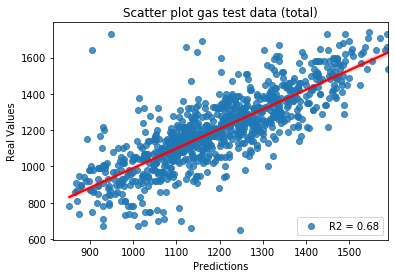

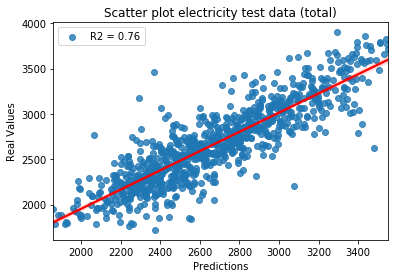

In [46]:
# Plot accuracy scatter plots for entire dataset.
# R2 is the string of the r2 score of the model.
plot_accuracy(gas_predictions,test_labels_gas,'Scatter plot gas test data (total)', 'R2 = 0.68')
plot_accuracy(ele_predictions,test_labels_ele,'Scatter plot electricity test data (total)', 'R2 = 0.76')

In [47]:
# Function for plotting R2 scatter plots for independent variables.
def plot_variables (predictions, test_labels, title, r2, x, y):
    seaborn.regplot(x = predictions, y = test_labels, label = r2,line_kws={"color": "red"}).set_title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend(loc="best")
    plt.show()

A


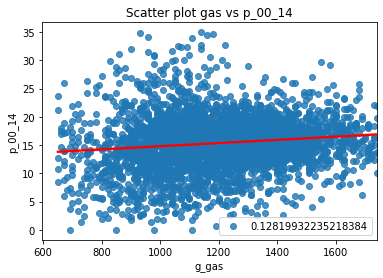

B


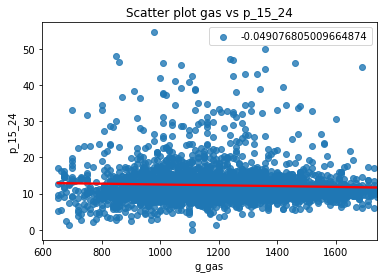

C


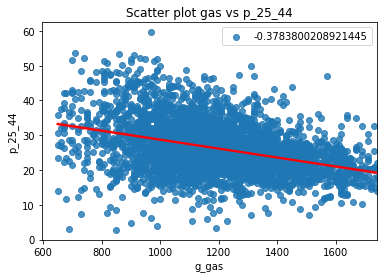

D


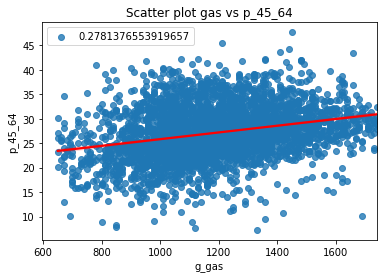

E


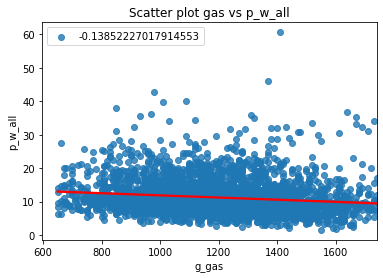

F


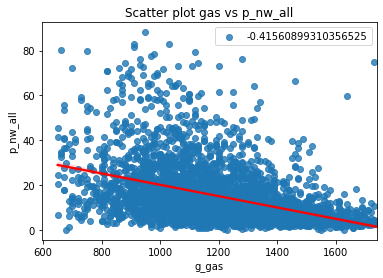

G


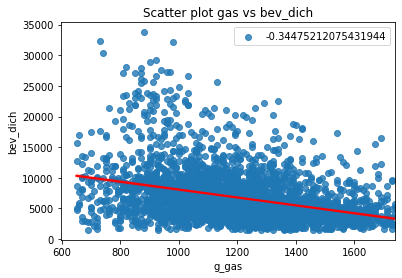

H


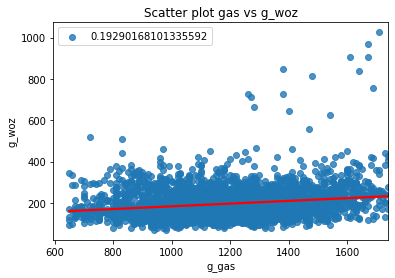

I


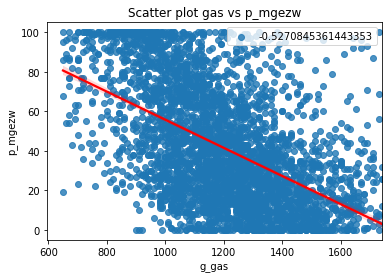

J


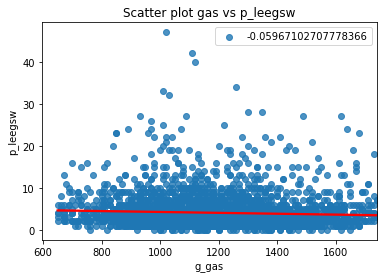

K


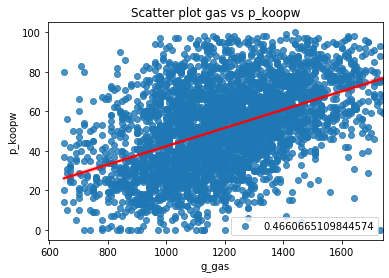

L


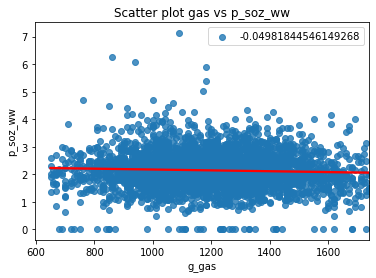

M


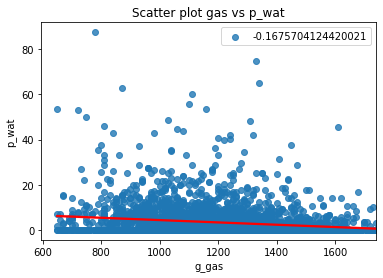

N


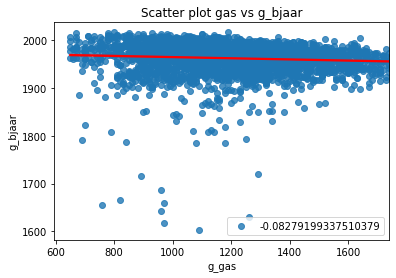

O


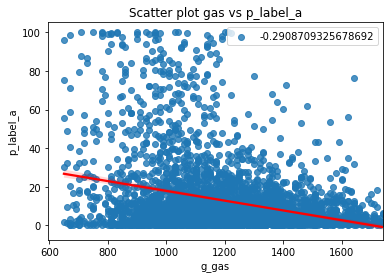

P


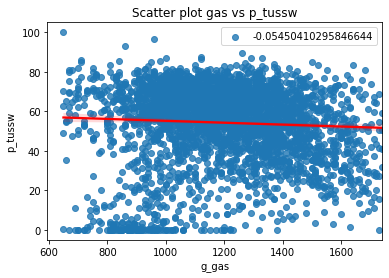

Q


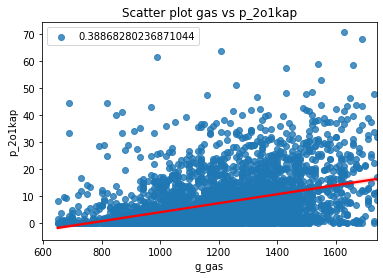

R


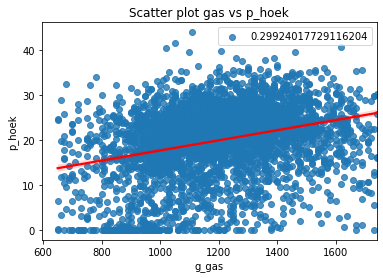

S


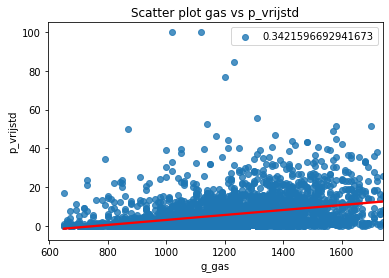

T


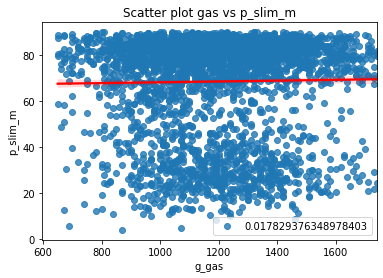

U


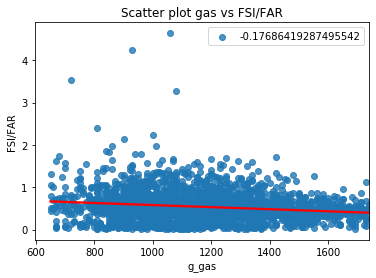

In [48]:
# Looking at some scatter plots to see if there are linear correlations between gas consumption and important variables.
# Entire dataset g_gas with independent variables:
# Plot accuracy scatter plots for entire dataset.
# R2 is the string of the r2 score of the model.
# R2 scores between g_gas and independent variables.
# R2 score for electricity visscher.
column_1 = finalDF["g_gas"]
column_2 = finalDF["p_00_14"]
correlation = column_1.astype('float64').corr(column_2.astype('float64'))
print('A')
plot_variables(column_1,column_2,'Scatter plot gas vs p_00_14', str(correlation), 'g_gas', 'p_00_14')

column_2 = finalDF["p_15_24"]
correlation = column_1.astype('float64').corr(column_2.astype('float64'))
print('B')
plot_variables(column_1,column_2,'Scatter plot gas vs p_15_24', str(correlation), 'g_gas', 'p_15_24')

column_2 = finalDF["p_25_44"]
correlation = column_1.astype('float64').corr(column_2.astype('float64'))
print('C')
plot_variables(column_1,column_2,'Scatter plot gas vs p_25_44', str(correlation), 'g_gas', "p_25_44")

column_2 = finalDF["p_45_64"]
correlation = column_1.astype('float64').corr(column_2.astype('float64'))
print('D')
plot_variables(column_1,column_2,'Scatter plot gas vs p_45_64', str(correlation), 'g_gas', "p_45_64")

column_2 = finalDF["p_w_all"]
correlation = column_1.astype('float64').corr(column_2.astype('float64'))
print('E')
plot_variables(column_1,column_2,'Scatter plot gas vs p_w_all', str(correlation), 'g_gas', "p_w_all")

column_2 = finalDF["p_nw_all"]
correlation = column_1.astype('float64').corr(column_2.astype('float64'))
print('F')
plot_variables(column_1,column_2,'Scatter plot gas vs p_nw_all', str(correlation), 'g_gas', "p_nw_all")

column_2 = finalDF["bev_dich"]
correlation = column_1.astype('float64').corr(column_2.astype('float64'))
print('G')
plot_variables(column_1,column_2,'Scatter plot gas vs bev_dich', str(correlation), 'g_gas', "bev_dich")

column_2 = finalDF["g_woz"]
correlation = column_1.astype('float64').corr(column_2.astype('float64'))
print('H')
plot_variables(column_1,column_2,'Scatter plot gas vs g_woz', str(correlation), 'g_gas', "g_woz")

column_2 = finalDF["p_mgezw"]
correlation = column_1.astype('float64').corr(column_2.astype('float64'))
print('I')
plot_variables(column_1,column_2,'Scatter plot gas vs p_mgezw', str(correlation), 'g_gas', "p_mgezw")

column_2 = finalDF["p_leegsw"]
correlation = column_1.astype('float64').corr(column_2.astype('float64'))
print('J')
plot_variables(column_1,column_2,'Scatter plot gas vs p_leegsw', str(correlation), 'g_gas', "p_leegsw")

column_2 = finalDF["p_koopw"]
correlation = column_1.astype('float64').corr(column_2.astype('float64'))
print('K')
plot_variables(column_1,column_2,'Scatter plot gas vs p_koopw', str(correlation), 'g_gas', "p_koopw")

column_2 = finalDF["p_soz_ww"]
correlation = column_1.astype('float64').corr(column_2.astype('float64'))
print('L')
plot_variables(column_1,column_2,'Scatter plot gas vs p_soz_ww', str(correlation), 'g_gas', "p_soz_ww")

column_2 = finalDF["p_wat"]
correlation = column_1.astype('float64').corr(column_2.astype('float64'))
print('M')
plot_variables(column_1,column_2,'Scatter plot gas vs p_wat', str(correlation), 'g_gas', "p_wat")

column_2 = finalDF["g_bjaar"]
correlation = column_1.astype('float64').corr(column_2.astype('float64'))
print('N')
plot_variables(column_1,column_2,'Scatter plot gas vs g_bjaar', str(correlation), 'g_gas', "g_bjaar")

column_2 = finalDF["p_label_a"]
correlation = column_1.astype('float64').corr(column_2.astype('float64'))
print('O')
plot_variables(column_1,column_2,'Scatter plot gas vs p_label_a', str(correlation), 'g_gas', "p_label_a")

column_2 = finalDF["p_tussw"]
correlation = column_1.astype('float64').corr(column_2.astype('float64'))
print('P')
plot_variables(column_1,column_2,'Scatter plot gas vs p_tussw', str(correlation), 'g_gas', "p_tussw")

column_2 = finalDF["p_2o1kap"]
correlation = column_1.astype('float64').corr(column_2.astype('float64'))
print('Q')
plot_variables(column_1,column_2,'Scatter plot gas vs p_2o1kap', str(correlation), 'g_gas', "p_2o1kap")

column_2 = finalDF["p_hoek"]
correlation = column_1.astype('float64').corr(column_2.astype('float64'))
print('R')
plot_variables(column_1,column_2,'Scatter plot gas vs p_hoek', str(correlation), 'g_gas', "p_hoek")

column_2 = finalDF["p_vrijstd"]
correlation = column_1.astype('float64').corr(column_2.astype('float64'))
print('S')
plot_variables(column_1,column_2,'Scatter plot gas vs p_vrijstd', str(correlation), 'g_gas', "p_vrijstd")

column_2 = finalDF["p_slim_m"]
correlation = column_1.astype('float64').corr(column_2.astype('float64'))
print('T')
plot_variables(column_1,column_2,'Scatter plot gas vs p_slim_m', str(correlation), 'g_gas', "p_slim_m")

column_2 = finalDF["FSI/FAR"]
correlation = column_1.astype('float64').corr(column_2.astype('float64'))
print('U')
plot_variables(column_1,column_2,'Scatter plot gas vs FSI/FAR', str(correlation), 'g_gas', "FSI/FAR")

A


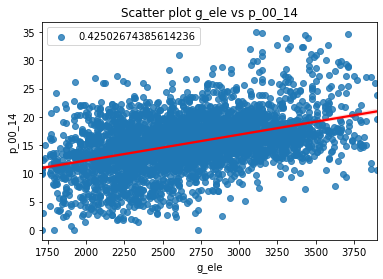

B


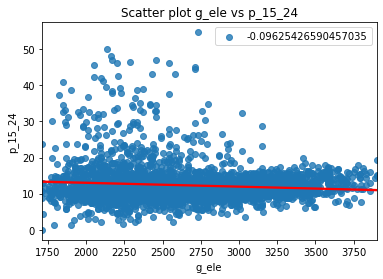

C


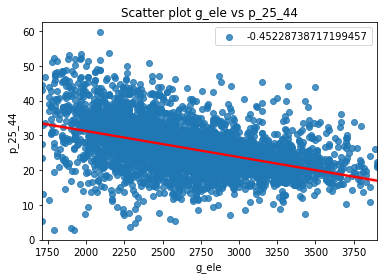

D


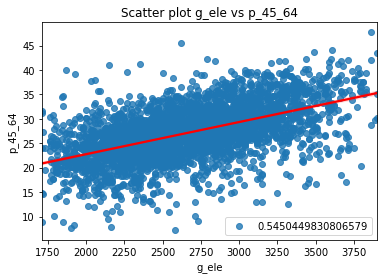

E


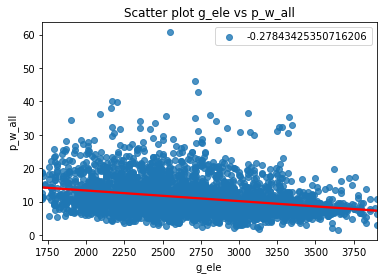

F


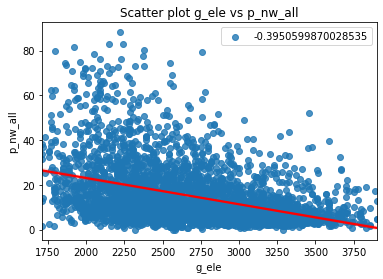

G


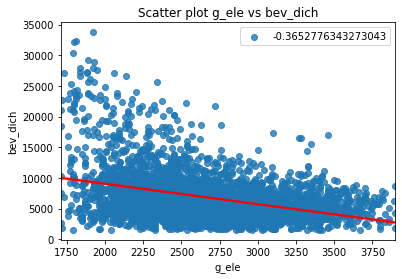

H


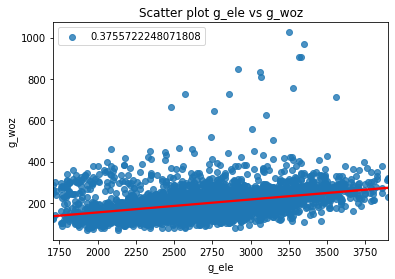

I


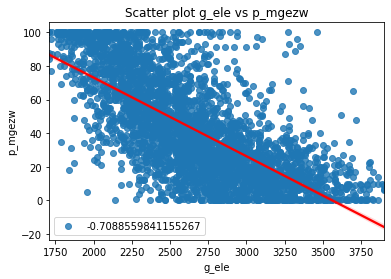

J


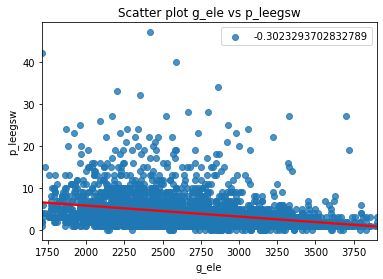

K


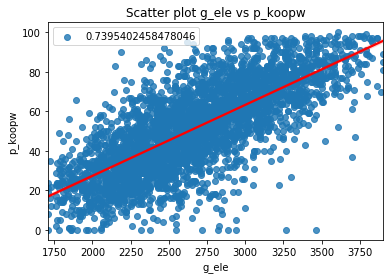

L


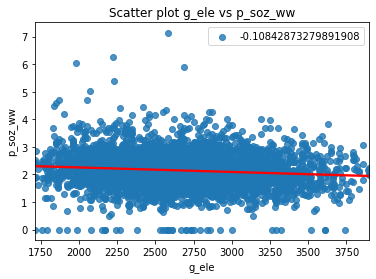

M


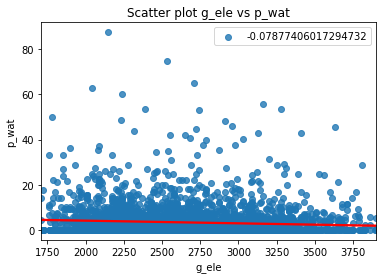

N


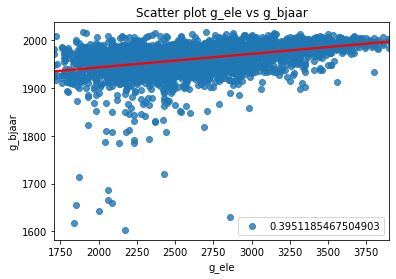

O


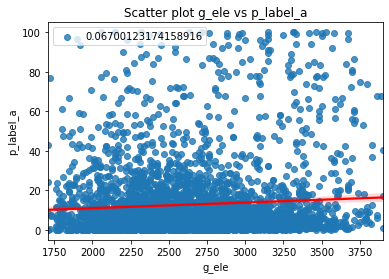

P


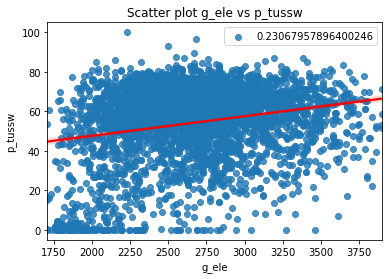

Q


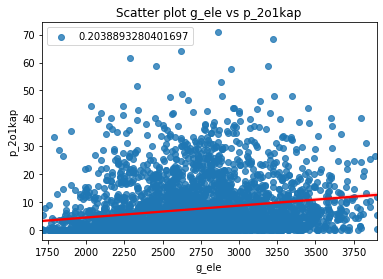

R


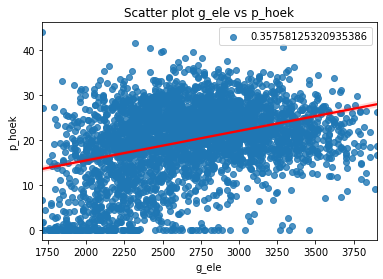

S


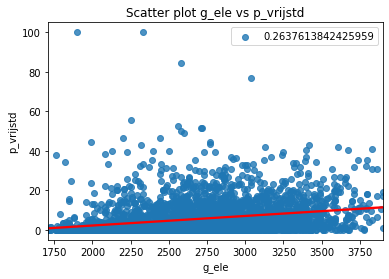

T


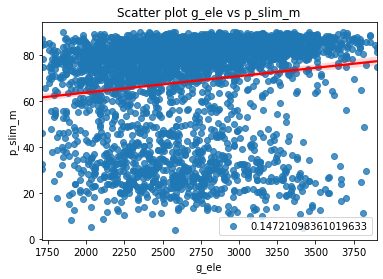

U


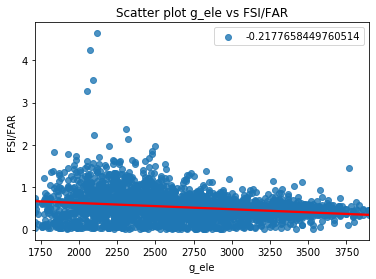

In [49]:
# Looking at some scatter plots to see if there are linear correlations between gas consumption and important variables.
# Entire dataset g_gas with independent variables:
# Plot accuracy scatter plots for entire dataset.
# R2 is the string of the r2 score of the model.
# R2 scores between g_gas and independent variables.
# R2 score for electricity visscher.
column_1 = finalDF["g_ele"]
column_2 = finalDF["p_00_14"]
correlation = column_1.astype('float64').corr(column_2.astype('float64'))
print('A')
plot_variables(column_1,column_2,'Scatter plot g_ele vs p_00_14', str(correlation), 'g_ele', 'p_00_14')

column_2 = finalDF["p_15_24"]
correlation = column_1.astype('float64').corr(column_2.astype('float64'))
print('B')
plot_variables(column_1,column_2,'Scatter plot g_ele vs p_15_24', str(correlation), 'g_ele', 'p_15_24')

column_2 = finalDF["p_25_44"]
correlation = column_1.astype('float64').corr(column_2.astype('float64'))
print('C')
plot_variables(column_1,column_2,'Scatter plot g_ele vs p_25_44', str(correlation), 'g_ele', "p_25_44")

column_2 = finalDF["p_45_64"]
correlation = column_1.astype('float64').corr(column_2.astype('float64'))
print('D')
plot_variables(column_1,column_2,'Scatter plot g_ele vs p_45_64', str(correlation), 'g_ele', "p_45_64")

column_2 = finalDF["p_w_all"]
correlation = column_1.astype('float64').corr(column_2.astype('float64'))
print('E')
plot_variables(column_1,column_2,'Scatter plot g_ele vs p_w_all', str(correlation), 'g_ele', "p_w_all")

column_2 = finalDF["p_nw_all"]
correlation = column_1.astype('float64').corr(column_2.astype('float64'))
print('F')
plot_variables(column_1,column_2,'Scatter plot g_ele vs p_nw_all', str(correlation), 'g_ele', "p_nw_all")

column_2 = finalDF["bev_dich"]
correlation = column_1.astype('float64').corr(column_2.astype('float64'))
print('G')
plot_variables(column_1,column_2,'Scatter plot g_ele vs bev_dich', str(correlation), 'g_ele', "bev_dich")

column_2 = finalDF["g_woz"]
correlation = column_1.astype('float64').corr(column_2.astype('float64'))
print('H')
plot_variables(column_1,column_2,'Scatter plot g_ele vs g_woz', str(correlation), 'g_ele', "g_woz")

column_2 = finalDF["p_mgezw"]
correlation = column_1.astype('float64').corr(column_2.astype('float64'))
print('I')
plot_variables(column_1,column_2,'Scatter plot g_ele vs p_mgezw', str(correlation), 'g_ele', "p_mgezw")

column_2 = finalDF["p_leegsw"]
correlation = column_1.astype('float64').corr(column_2.astype('float64'))
print('J')
plot_variables(column_1,column_2,'Scatter plot g_ele vs p_leegsw', str(correlation), 'g_ele', "p_leegsw")

column_2 = finalDF["p_koopw"]
correlation = column_1.astype('float64').corr(column_2.astype('float64'))
print('K')
plot_variables(column_1,column_2,'Scatter plot g_ele vs p_koopw', str(correlation), 'g_ele', "p_koopw")

column_2 = finalDF["p_soz_ww"]
correlation = column_1.astype('float64').corr(column_2.astype('float64'))
print('L')
plot_variables(column_1,column_2,'Scatter plot g_ele vs p_soz_ww', str(correlation), 'g_ele', "p_soz_ww")

column_2 = finalDF["p_wat"]
correlation = column_1.astype('float64').corr(column_2.astype('float64'))
print('M')
plot_variables(column_1,column_2,'Scatter plot g_ele vs p_wat', str(correlation), 'g_ele', "p_wat")

column_2 = finalDF["g_bjaar"]
correlation = column_1.astype('float64').corr(column_2.astype('float64'))
print('N')
plot_variables(column_1,column_2,'Scatter plot g_ele vs g_bjaar', str(correlation), 'g_ele', "g_bjaar")

column_2 = finalDF["p_label_a"]
correlation = column_1.astype('float64').corr(column_2.astype('float64'))
print('O')
plot_variables(column_1,column_2,'Scatter plot g_ele vs p_label_a', str(correlation), 'g_ele', "p_label_a")

column_2 = finalDF["p_tussw"]
correlation = column_1.astype('float64').corr(column_2.astype('float64'))
print('P')
plot_variables(column_1,column_2,'Scatter plot g_ele vs p_tussw', str(correlation), 'g_ele', "p_tussw")

column_2 = finalDF["p_2o1kap"]
correlation = column_1.astype('float64').corr(column_2.astype('float64'))
print('Q')
plot_variables(column_1,column_2,'Scatter plot g_ele vs p_2o1kap', str(correlation), 'g_ele', "p_2o1kap")

column_2 = finalDF["p_hoek"]
correlation = column_1.astype('float64').corr(column_2.astype('float64'))
print('R')
plot_variables(column_1,column_2,'Scatter plot g_ele vs p_hoek', str(correlation), 'g_ele', "p_hoek")

column_2 = finalDF["p_vrijstd"]
correlation = column_1.astype('float64').corr(column_2.astype('float64'))
print('S')
plot_variables(column_1,column_2,'Scatter plot g_ele vs p_vrijstd', str(correlation), 'g_ele', "p_vrijstd")

column_2 = finalDF["p_slim_m"]
correlation = column_1.astype('float64').corr(column_2.astype('float64'))
print('T')
plot_variables(column_1,column_2,'Scatter plot g_ele vs p_slim_m', str(correlation), 'g_ele', "p_slim_m")

column_2 = finalDF["FSI/FAR"]
correlation = column_1.astype('float64').corr(column_2.astype('float64'))
print('U')
plot_variables(column_1,column_2,'Scatter plot g_ele vs FSI/FAR', str(correlation), 'g_ele', "FSI/FAR")

# 6 Train RF models for various city sizes

# 6.1 Small cities

In [50]:
# Select all the neighbourhoods which are in small cities.
small_cities = finalDF.loc[finalDF['type_stad'] == 1]

In [51]:
# Check the dataframe.
small_cities.head

<bound method NDFrame.head of                   gm_naam  type_stad   g_ele   g_gas    p_00_14    p_15_24  \
53    Hoogezand-Sappemeer          1  2130.0  1170.0  14.893617   9.422492   
54    Hoogezand-Sappemeer          1  2640.0  1510.0  11.956522  10.326087   
55    Hoogezand-Sappemeer          1  1900.0  1140.0   8.450704   8.450704   
56    Hoogezand-Sappemeer          1  2230.0  1180.0   9.589041  10.958904   
57    Hoogezand-Sappemeer          1  2300.0  1280.0  16.719243  13.880126   
...                   ...        ...     ...     ...        ...        ...   
3434          Berg en Dal          1  2550.0  1310.0   8.178439   9.293680   
3435          Berg en Dal          1  2850.0  1300.0   7.956989  10.752688   
3436          Berg en Dal          1  2930.0  1360.0  15.517241  11.576355   
3466          Montferland          1  3040.0  1450.0  12.900097  11.348206   
3467          Montferland          1  3110.0  1480.0  15.155807  10.906516   

        p_25_44    p_45_64    p_w

In [52]:
# Use function for dataset splitting and finding best hyperparameters.
train_features_gas_sc, test_features_gas_sc, train_labels_gas_sc, test_labels_gas_sc, rf_gas_sc, train_features_ele_sc, test_features_ele_sc, train_labels_ele_sc, test_labels_ele_sc, rf_ele_sc = hyperparam(small_cities, random_grid)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits


In [53]:
# Train the models using the best hyperparameters.
rf_gas_sc.fit(train_features_gas_sc, train_labels_gas_sc);
rf_ele_sc.fit(train_features_ele_sc, train_labels_ele_sc);

In [54]:
# Use the forest's predict method on the test data.
gas_predictions_sc = rf_gas_sc.predict(test_features_gas_sc)
ele_predictions_sc = rf_ele_sc.predict(test_features_ele_sc)

In [55]:
# Getting accuracy scores and correlation coefficients for gas.
gas_validate_sc = validate(rf_gas_sc, gas_predictions_sc, test_labels_gas_sc, 'Validation scores for small cities (gas)')
gas_validate_sc

Validation scores for small cities (gas)


('Validation scores for small cities (gas)',
 'MEAN:',
 1267.74,
 'MAE:',
 96.97,
 'MAPE:',
 7.86,
 'RMSE:',
 119.98,
 'R2 validation set:',
 0.64,
 'OOB R2:',
 0.69)

In [56]:
# Getting accuracy scores and correlation coefficients for electricity.
ele_validate_sc = validate(rf_ele_sc, ele_predictions_sc, test_labels_ele_sc, 'Validation scores for small cities (electricity)')
ele_validate_sc

Validation scores for small cities (electricity)


('Validation scores for small cities (electricity)',
 'MEAN:',
 2784.1,
 'MAE:',
 161.39,
 'MAPE:',
 6.03,
 'RMSE:',
 198.71,
 'R2 validation set:',
 0.76,
 'OOB R2:',
 0.73)

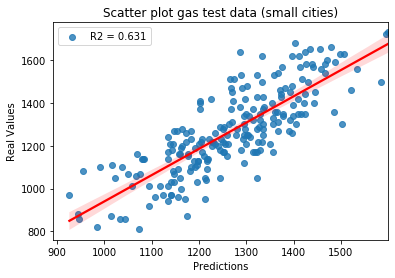

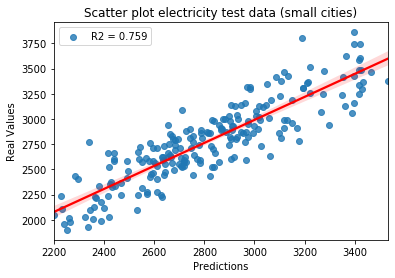

In [57]:
# Plot accuracy scatter plots for small cities.
# R2 is the string of the r2 score of the model.
plot_accuracy(gas_predictions_sc ,test_labels_gas_sc,'Scatter plot gas test data (small cities)', 'R2 = 0.631')
plot_accuracy(ele_predictions_sc,test_labels_ele_sc,'Scatter plot electricity test data (small cities)', 'R2 = 0.759')

In [58]:
# Calculate permutation importance scores for gas.
perm_gas_sc = permutation(small_cities, rf_gas_sc, train_features_gas_sc, train_labels_gas_sc, 'gas_small')

p_mgezw 0.305 +/- 0.018
g_bjaar 0.242 +/- 0.011
p_tussw 0.091 +/- 0.007
p_2o1kap0.054 +/- 0.003
p_vrijstd0.049 +/- 0.003
p_koopw 0.046 +/- 0.003
FSI/FAR 0.042 +/- 0.003
p_25_44 0.035 +/- 0.002
bev_dich0.032 +/- 0.001
p_label_a0.031 +/- 0.001
g_woz   0.027 +/- 0.002
p_hoek  0.024 +/- 0.001
p_nw_all0.022 +/- 0.001
p_45_64 0.022 +/- 0.001
p_00_14 0.021 +/- 0.001
p_15_24 0.015 +/- 0.001
p_wat   0.012 +/- 0.001
p_soz_ww0.011 +/- 0.001
p_w_all 0.010 +/- 0.000
p_slim_m0.009 +/- 0.001
p_leegsw0.005 +/- 0.000


In [59]:
# Calculate permutation importance scores for electricity.
perm_ele_sc = permutation(small_cities, rf_ele_sc, train_features_ele_sc, train_labels_ele_sc, 'ele_small')

p_koopw 0.243 +/- 0.009
g_woz   0.184 +/- 0.009
p_mgezw 0.137 +/- 0.006
g_bjaar 0.080 +/- 0.004
p_45_64 0.055 +/- 0.004
p_15_24 0.033 +/- 0.001
p_00_14 0.032 +/- 0.002
p_leegsw0.016 +/- 0.001
p_slim_m0.015 +/- 0.001
p_25_44 0.015 +/- 0.001
FSI/FAR 0.014 +/- 0.001
p_label_a0.014 +/- 0.000
p_w_all 0.013 +/- 0.001
p_hoek  0.013 +/- 0.001
p_nw_all0.012 +/- 0.000
p_vrijstd0.011 +/- 0.001
p_2o1kap0.010 +/- 0.000
p_soz_ww0.010 +/- 0.000
bev_dich0.009 +/- 0.000
p_tussw 0.009 +/- 0.001
p_wat   0.005 +/- 0.000


# 6.2 Middle sized cities

In [60]:
# Select all the neighbourhoods which are in middle sized cities.
medium_cities = finalDF.loc[finalDF['type_stad'] == 2]

In [61]:
# Check the dataframe.
medium_cities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1526 entries, 98 to 3465
Data columns (total 25 columns):
gm_naam      1526 non-null object
type_stad    1526 non-null int64
g_ele        1526 non-null float64
g_gas        1526 non-null float64
p_00_14      1526 non-null float64
p_15_24      1526 non-null float64
p_25_44      1526 non-null float64
p_45_64      1526 non-null float64
p_w_all      1526 non-null float64
p_nw_all     1526 non-null float64
bev_dich     1526 non-null float64
g_woz        1526 non-null float64
p_mgezw      1526 non-null float64
p_leegsw     1526 non-null float64
p_koopw      1526 non-null float64
p_soz_ww     1526 non-null float64
p_wat        1526 non-null float64
g_bjaar      1526 non-null int64
p_label_a    1526 non-null float64
p_tussw      1526 non-null float64
p_2o1kap     1526 non-null float64
p_hoek       1526 non-null float64
p_vrijstd    1526 non-null float64
p_slim_m     1526 non-null float64
FSI/FAR      1526 non-null float64
dtypes: float64(22), i

In [62]:
# Use function for dataset splitting and finding best hyperparameters.
train_features_gas_mc, test_features_gas_mc, train_labels_gas_mc, test_labels_gas_mc, rf_gas_mc, train_features_ele_mc, test_features_ele_mc, train_labels_ele_mc, test_labels_ele_mc, rf_ele_mc = hyperparam(medium_cities, random_grid)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits


In [63]:
# Train the models using the best hyperparameters.
rf_gas_mc.fit(train_features_gas_mc, train_labels_gas_mc);
rf_ele_mc.fit(train_features_ele_mc, train_labels_ele_mc);

In [64]:
# Use the forest's predict method on the test data.
gas_predictions_mc = rf_gas_mc.predict(test_features_gas_mc)
ele_predictions_mc = rf_ele_mc.predict(test_features_ele_mc)

In [65]:
# Getting accuracy scores and correlation coefficients for gas.
gas_validate_mc = validate(rf_gas_mc, gas_predictions_mc, test_labels_gas_mc, 'Validation scores for middle sized cities (gas)')
gas_validate_mc

Validation scores for middle sized cities (gas)


('Validation scores for middle sized cities (gas)',
 'MEAN:',
 1189.4,
 'MAE:',
 95.06,
 'MAPE:',
 8.52,
 'RMSE:',
 126.7,
 'R2 validation set:',
 0.6,
 'OOB R2:',
 0.65)

In [66]:
# Getting accuracy scores and correlation coefficients for electricity.
ele_validate_mc = validate(rf_ele_mc, ele_predictions_mc, test_labels_ele_mc, 'Validation scores for middle sized cities (electricity)')
ele_validate_mc

Validation scores for middle sized cities (electricity)


('Validation scores for middle sized cities (electricity)',
 'MEAN:',
 2696.96,
 'MAE:',
 173.44,
 'MAPE:',
 6.51,
 'RMSE:',
 230.57,
 'R2 validation set:',
 0.68,
 'OOB R2:',
 0.76)

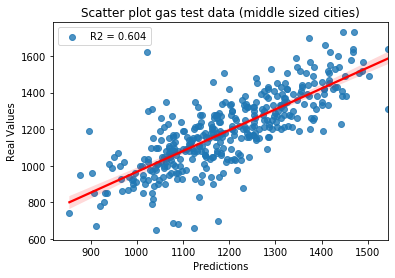

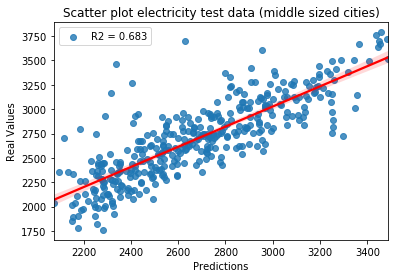

In [67]:
# Plot accuracy scatter plots for middle sized cities.
# R2 is the string of the r2 score of the model.
plot_accuracy(gas_predictions_mc ,test_labels_gas_mc,'Scatter plot gas test data (middle sized cities)', 'R2 = 0.604')
plot_accuracy(ele_predictions_mc,test_labels_ele_mc,'Scatter plot electricity test data (middle sized cities)', 'R2 = 0.683')

In [68]:
# Calculate permutation importance scores for gas.
perm_gas_mc = permutation(medium_cities, rf_gas_mc, train_features_gas_mc, train_labels_gas_mc, 'gas_medium')

g_bjaar 0.317 +/- 0.013
p_mgezw 0.262 +/- 0.009
p_koopw 0.155 +/- 0.004
p_2o1kap0.082 +/- 0.002
p_nw_all0.077 +/- 0.003
p_label_a0.047 +/- 0.002
p_tussw 0.045 +/- 0.002
bev_dich0.036 +/- 0.001
p_vrijstd0.035 +/- 0.002
FSI/FAR 0.033 +/- 0.002
p_45_64 0.032 +/- 0.001
g_woz   0.032 +/- 0.001
p_25_44 0.031 +/- 0.001
p_00_14 0.025 +/- 0.001
p_w_all 0.019 +/- 0.001
p_slim_m0.018 +/- 0.001
p_hoek  0.018 +/- 0.000
p_15_24 0.017 +/- 0.001
p_soz_ww0.013 +/- 0.001
p_leegsw0.011 +/- 0.001
p_wat   0.008 +/- 0.001


In [69]:
# Calculate permutation importance scores for electricity.
perm_ele_mc = permutation(medium_cities, rf_ele_mc, train_features_ele_mc, train_labels_ele_mc, 'ele_medium')

p_koopw 0.271 +/- 0.013
p_mgezw 0.191 +/- 0.006
g_woz   0.164 +/- 0.008
g_bjaar 0.085 +/- 0.002
p_45_64 0.051 +/- 0.002
p_00_14 0.032 +/- 0.001
p_25_44 0.026 +/- 0.001
p_slim_m0.018 +/- 0.001
p_hoek  0.018 +/- 0.001
FSI/FAR 0.017 +/- 0.001
p_15_24 0.017 +/- 0.001
p_w_all 0.017 +/- 0.001
p_leegsw0.014 +/- 0.001
p_nw_all0.012 +/- 0.000
p_vrijstd0.012 +/- 0.001
p_label_a0.011 +/- 0.000
p_soz_ww0.010 +/- 0.000
p_2o1kap0.010 +/- 0.000
bev_dich0.010 +/- 0.000
p_tussw 0.010 +/- 0.000
p_wat   0.006 +/- 0.000


# 6.3 Big cities

In [70]:
# Select all the neighbourhoods which are in big cities.
big_cities = finalDF.loc[finalDF['type_stad'] == 3]

In [71]:
# Check dataframe.
big_cities

gm_naam  type_stad   g_ele   g_gas    p_00_14    p_15_24    p_25_44  \
0     Groningen          3  2460.0  1250.0   2.818489  47.012401  33.370913   
1     Groningen          3  2170.0  1240.0   2.651515  47.045455  32.727273   
2     Groningen          3  2110.0  1050.0   3.065134  40.996169  34.865900   
3     Groningen          3  2130.0  1420.0   2.549575  39.376771  38.810198   
4     Groningen          3  2100.0  1000.0   4.718693  41.833031  30.399274   
...         ...        ...     ...     ...        ...        ...        ...   
2858    Tilburg          3  2380.0  1090.0  11.848341   8.530806  21.800948   
2859    Tilburg          3  3020.0  1140.0  15.789474  11.052632  21.578947   
2860    Tilburg          3  2980.0  1020.0  18.120805   6.711409  25.503356   
2861    Tilburg          3  2900.0   970.0  14.827586   9.310345  23.448276   
2862    Tilburg          3  3330.0  1620.0  15.238095   8.888889  17.460317   

        p_45_64    p_w_all   p_nw_all  ...  p_soz_ww     p_wat  g_bjaar  \
0     11.273957  16.103604   9.684685  ...  1.351351  5.128205     1903   
1     11.212121  15.606061  10.530303  ...  1.212121  6.779661     1916   
2     14.048531  15.688776  12.882653  ...  1.785714  6.896552     1928   
3     10.764873  18.413598   8.498584  ...  2.266289  9.090909     1908   
4     14.700544  16.333938  10.072595  ...  1.633394  2.222222     1928   
...         ...        ...        ...  ...       ...       ...      ...   
2858  23.696682  12.206573  14.553991  ...  2.816901  5.882353     1973   
2859  29.473684  13.612565  18.848168  ...  3.141361  0.000000     1980   
2860  27.516779  12.666667  14.666667  ...  2.666667  0.000000     1977   
2861  30.689655  13.840830  12.802768  ...  2.076125  0.000000     1979   
2862  26.349206   6.962025   2.215190  ...  1.898734  0.000000     1972   

      p_label_a  p_tussw  p_2o1kap  p_hoek  p_vrijstd  p_slim_m   FSI/FAR  
0         10.40    51.20      0.00    4.20       0.20      60.7  1.685000  
1          9.00    38.39      0.95    5.21       1.26      50.4  1.523000  
2          5.87    43.17      1.27    9.05       0.63      60.0  1.412000  
3          7.60    50.88      0.00    7.02       1.17      65.4  1.718000  
4         20.90    54.13      0.96   11.04       0.64      57.4  2.235000  
...         ...      ...       ...     ...        ...       ...       ...  
2858       0.48    72.25      0.00   18.66       0.00      82.6  0.257917  
2859      12.61    75.07      4.48   20.17       0.00      86.2  0.072218  
2860      14.98    63.76      7.32   24.04       0.00      86.2  0.039388  
2861       9.20    68.05      1.38   24.60       1.15      84.3  0.073446  
2862       0.67    40.83     19.83   28.17      11.00      87.9  0.417916  

[1075 rows x 25 columns]

In [72]:
# Use function for dataset splitting and finding best hyperparameters.
train_features_gas_bc, test_features_gas_bc, train_labels_gas_bc, test_labels_gas_bc, rf_gas_bc, train_features_ele_bc, test_features_ele_bc, train_labels_ele_bc, test_labels_ele_bc, rf_ele_bc = hyperparam(big_cities, random_grid)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits


In [73]:
# Train the models using the best hyperparameters.
rf_gas_bc.fit(train_features_gas_bc, train_labels_gas_bc);
rf_ele_bc.fit(train_features_ele_bc, train_labels_ele_bc);

In [74]:
# Use the forest's predict method on the test data.
gas_predictions_bc = rf_gas_bc.predict(test_features_gas_bc)
ele_predictions_bc = rf_ele_bc.predict(test_features_ele_bc)

In [75]:
# Getting accuracy scores and correlation coefficients for gas.
gas_validate_bc = validate(rf_gas_bc, gas_predictions_bc, test_labels_gas_bc, 'Validation scores for large cities (gas)')
gas_validate_bc

Validation scores for large cities (gas)


('Validation scores for large cities (gas)',
 'MEAN:',
 1142.27,
 'MAE:',
 93.18,
 'MAPE:',
 8.57,
 'RMSE:',
 120.91,
 'R2 validation set:',
 0.69,
 'OOB R2:',
 0.59)

In [76]:
# Getting accuracy scores and correlation coefficients for electricity.
ele_validate_bc = validate(rf_ele_bc, ele_predictions_bc, test_labels_ele_bc, 'Validation scores for large cities (electricity)')
ele_validate_bc

Validation scores for large cities (electricity)


('Validation scores for large cities (electricity)',
 'MEAN:',
 2504.01,
 'MAE:',
 148.29,
 'MAPE:',
 6.08,
 'RMSE:',
 186.97,
 'R2 validation set:',
 0.83,
 'OOB R2:',
 0.8)

In [77]:
# Calculate permutation importance scores for gas.
perm_gas_bc = permutation(big_cities, rf_gas_bc, train_features_gas_bc, train_labels_gas_bc, 'gas_big')


p_nw_all0.219 +/- 0.008
p_mgezw 0.178 +/- 0.008
p_koopw 0.118 +/- 0.004
g_bjaar 0.103 +/- 0.004
p_label_a0.073 +/- 0.004
p_25_44 0.054 +/- 0.002
g_woz   0.054 +/- 0.002
p_vrijstd0.045 +/- 0.003
p_00_14 0.045 +/- 0.003
p_tussw 0.039 +/- 0.002
p_hoek  0.035 +/- 0.002
bev_dich0.031 +/- 0.002
p_45_64 0.031 +/- 0.002
p_2o1kap0.027 +/- 0.001
p_15_24 0.026 +/- 0.001
p_w_all 0.026 +/- 0.001
p_soz_ww0.022 +/- 0.001
FSI/FAR 0.021 +/- 0.001
p_slim_m0.020 +/- 0.001
p_leegsw0.011 +/- 0.000
p_wat   0.010 +/- 0.001


In [78]:
# Calculate permutation importance scores for gas.
perm_ele_bc = permutation(big_cities, rf_ele_bc, train_features_ele_bc, train_labels_ele_bc, 'ele_big')


p_mgezw 0.285 +/- 0.010
p_koopw 0.205 +/- 0.008
p_vrijstd0.050 +/- 0.003
g_woz   0.046 +/- 0.002
g_bjaar 0.041 +/- 0.004
p_25_44 0.034 +/- 0.002
p_00_14 0.029 +/- 0.002
p_tussw 0.023 +/- 0.001
p_nw_all0.023 +/- 0.001
p_45_64 0.019 +/- 0.001
p_2o1kap0.017 +/- 0.001
p_hoek  0.016 +/- 0.001
bev_dich0.012 +/- 0.000
p_w_all 0.012 +/- 0.000
p_soz_ww0.011 +/- 0.001
p_label_a0.010 +/- 0.000
p_15_24 0.010 +/- 0.000
p_slim_m0.010 +/- 0.001
FSI/FAR 0.007 +/- 0.000
p_leegsw0.006 +/- 0.000
p_wat   0.003 +/- 0.000


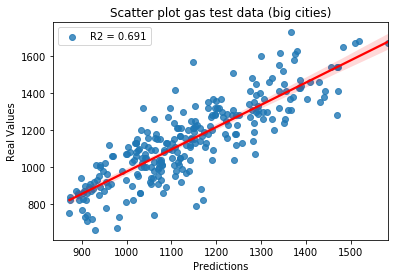

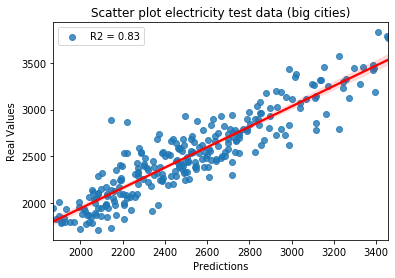

In [79]:
# Plot accuracy scatter plots for big cities.
# R2 is the string of the r2 score of the model.
plot_accuracy(gas_predictions_bc ,test_labels_gas_bc,'Scatter plot gas test data (big cities)', 'R2 = 0.691')
plot_accuracy(ele_predictions_bc,test_labels_ele_bc,'Scatter plot electricity test data (big cities)', 'R2 = 0.83')

# 8 Additional analysis amsterdam

In [82]:
# A function for 10-fold cross-validation.
def cross_validation (dataset): 
    from sklearn.model_selection import KFold, cross_val_score
    
    X_bc = dataset.iloc[:, 4:].values
    y_gas_bc = np.array(dataset.iloc[:, 3].values)
    y_ele_bc = np.array(dataset.iloc[:, 2].values)
    
    # Split the data into training and testing sets.
    train_features_gas, test_features_gas, train_labels_gas, test_labels_gas = train_test_split(X_bc, y_gas_bc, test_size = 0.25, random_state = 42)
    train_features_ele, test_features_ele, train_labels_ele, test_labels_ele = train_test_split(X_bc, y_ele_bc, test_size = 0.25, random_state = 42)

    # Set random_state.
    rf = RandomForestRegressor(random_state = 42)

    # Random search of parameters, using 3 fold cross validation. 
    # Search across 100 different combinations, and use all available cores.
    rf_random = RandomizedSearchCV(estimator = rf, param_distributions =random_grid, n_iter = 30, cv = 3, verbose=2, n_jobs = -1)

    # Fit the random search model
    rf_random.fit(train_features_gas, train_labels_gas);
    gas_params = rf_random.best_params_
    
    rf_random.fit(train_features_ele, train_labels_ele);
    ele_params = rf_random.best_params_
    
    # Instantiate model with best parameters
    rf_gas_bc2 = RandomForestRegressor(n_estimators = gas_params['n_estimators'], max_depth = gas_params['max_depth'], min_samples_split = gas_params['min_samples_split'], min_samples_leaf = gas_params['min_samples_leaf'], max_features = 0.33, bootstrap = gas_params['bootstrap'], oob_score = True, random_state = 42)
    rf_ele_bc2 = RandomForestRegressor(n_estimators = ele_params['n_estimators'], max_depth = ele_params['max_depth'], min_samples_split = ele_params['min_samples_split'], min_samples_leaf = ele_params['min_samples_leaf'], max_features = 0.33, bootstrap = ele_params['bootstrap'], oob_score = True, random_state = 42)
    
    # make KFold 
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    
    # Create empty arrays for storing values
    municipality = np.empty
    predictions_ele = np.empty
    actual_ele = np.empty
    
    
    predictions_gas = np.empty
    actual_gas = np.empty
    
    #Create a for loop which splits data into 10 folds, stores the municipality names, actual values and 
    # predicitons in lists and puts them into a dataframe afterwards.
    # Because this is done in order, the right municipality names will be with the right actual values and predicitons.
    for train_index, test_index in kf.split(X_bc):
    
        municipality = np.append(municipality, dataset.iloc[:, 0].values[test_index])
        actual_ele = np.append(actual_ele, dataset.iloc[:, 2].values[test_index])
        actual_gas = np.append(actual_gas, dataset.iloc[:, 3].values[test_index])
    
        X_train, X_test = X_bc[train_index], X_bc[test_index]
        y_train_ele, y_test_ele = y_ele_bc[train_index], y_ele_bc[test_index] 
        y_train_gas, y_test_gas = y_gas_bc[train_index], y_gas_bc[test_index]
    
        rf_ele_bc2.fit(X_train, y_train_ele)
        rf_gas_bc2.fit(X_train, y_train_gas)
    
        ele_predictions_bc2 = rf_ele_bc2.predict(X_test)
        gas_predictions_bc2 = rf_gas_bc2.predict(X_test)
    
        predictions_ele = np.append(predictions_ele, ele_predictions_bc2)
        predictions_gas = np.append(predictions_gas, gas_predictions_bc2)
    
    df_ele = pd.DataFrame({'municipality':municipality[1:], 'prediction':predictions_ele[1:], 'actual':actual_ele[1:]})
    df_gas = pd.DataFrame({'municipality':municipality[1:], 'prediction':predictions_gas[1:], 'actual':actual_gas[1:]})
    
    return df_ele, df_gas, rf_ele_bc2, rf_gas_bc2, train_features_ele, train_labels_ele, train_features_gas, train_labels_gas, test_features_ele, test_labels_ele, test_features_gas, test_labels_gas
    

In [83]:
# Initiate cross_validation function
bc2_df_ele, bc2_df_gas, rf_ele_bc2, rf_gas_bc2, train_features_ele_bc2, train_labels_ele_bc2, train_features_gas_bc2, train_labels_gas_bc2, test_features_ele_bc2, test_labels_ele_bc2, test_features_gas_bc2, test_labels_gas_bc2 = cross_validation(big_cities)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits


In [84]:
# check output
bc2_df_gas

municipality prediction actual
0       Groningen    1016.64   1030
1       Groningen    1305.03   1600
2       Groningen    1254.57   1280
3       Groningen    1283.09   1070
4          Almere    1189.43   1350
...           ...        ...    ...
1070      Tilburg    1115.82   1130
1071      Tilburg    1429.81   1520
1072      Tilburg    1126.56   1020
1073      Tilburg    1042.55    860
1074      Tilburg    1112.61    720

[1075 rows x 3 columns]

In [85]:
# check output
bc2_df_ele

municipality prediction actual
0       Groningen    2160.43   1870
1       Groningen    3117.48   2860
2       Groningen    3172.53   2950
3       Groningen    3233.73   2790
4          Almere    2758.68   2750
...           ...        ...    ...
1070      Tilburg    2578.38   2770
1071      Tilburg    3360.17   3580
1072      Tilburg    2521.49   2630
1073      Tilburg    2199.42   2110
1074      Tilburg    2483.17   2420

[1075 rows x 3 columns]

In [86]:
# Make subset of amsterdam
bc2_ams_ele = bc2_df_ele.loc[bc2_df_ele['municipality'] == 'Amsterdam']
bc2_ams_gas = bc2_df_gas.loc[bc2_df_gas['municipality'] == 'Amsterdam']

In [92]:
# accuracy for amsterdam gas
ams_val_gas = validate(rf_gas_bc2, bc2_ams_gas["prediction"],bc2_ams_gas["actual"], 'Validation scores for Amsterdam (gas)')
ams_val_gas

Validation scores for Amsterdam (gas)


('Validation scores for Amsterdam (gas)',
 'MEAN:',
 1008.45,
 'MAE:',
 94.19,
 'MAPE:',
 9.74,
 'RMSE:',
 129.26,
 'R2 validation set:',
 0.64,
 'OOB R2:',
 0.61)

In [93]:
# accuracy for amsterdam ele
ams_val_ele = validate(rf_ele_bc2, bc2_ams_ele["prediction"],bc2_ams_ele["actual"], 'Validation scores for Amsterdam (electricity)')
ams_val_ele

Validation scores for Amsterdam (electricity)


('Validation scores for Amsterdam (electricity)',
 'MEAN:',
 2223.68,
 'MAE:',
 142.25,
 'MAPE:',
 6.48,
 'RMSE:',
 180.13,
 'R2 validation set:',
 0.81,
 'OOB R2:',
 0.81)

In [95]:
# permutation importance electricity
perm_ele_bc2 = permutation(big_cities, rf_ele_bc2, train_features_ele_bc2, train_labels_ele_bc2, 'ams_ele')

p_mgezw 0.289 +/- 0.010
p_koopw 0.208 +/- 0.007
g_bjaar 0.051 +/- 0.005
g_woz   0.048 +/- 0.002
p_vrijstd0.045 +/- 0.003
p_25_44 0.034 +/- 0.002
p_nw_all0.030 +/- 0.002
p_tussw 0.025 +/- 0.001
p_00_14 0.023 +/- 0.001
p_hoek  0.022 +/- 0.002
p_45_64 0.018 +/- 0.001
p_2o1kap0.014 +/- 0.001
bev_dich0.013 +/- 0.000
p_w_all 0.012 +/- 0.000
p_15_24 0.012 +/- 0.000
p_soz_ww0.011 +/- 0.001
p_label_a0.009 +/- 0.000
p_slim_m0.009 +/- 0.001
FSI/FAR 0.007 +/- 0.000
p_leegsw0.006 +/- 0.000
p_wat   0.004 +/- 0.000


In [96]:
# permutation importance gas
perm_gas_b2c = permutation(big_cities, rf_gas_bc2, train_features_gas_bc2, train_labels_gas_bc2, 'ams_gas')

p_nw_all0.226 +/- 0.010
p_mgezw 0.170 +/- 0.008
p_koopw 0.129 +/- 0.006
g_bjaar 0.105 +/- 0.005
p_label_a0.066 +/- 0.004
p_25_44 0.054 +/- 0.002
g_woz   0.050 +/- 0.002
p_00_14 0.040 +/- 0.003
p_tussw 0.040 +/- 0.002
p_vrijstd0.040 +/- 0.003
p_hoek  0.035 +/- 0.002
p_2o1kap0.033 +/- 0.002
p_45_64 0.031 +/- 0.002
p_15_24 0.024 +/- 0.002
p_w_all 0.024 +/- 0.001
bev_dich0.022 +/- 0.001
p_soz_ww0.019 +/- 0.001
p_slim_m0.019 +/- 0.001
FSI/FAR 0.017 +/- 0.001
p_wat   0.013 +/- 0.001
p_leegsw0.011 +/- 0.001


In [97]:
# select Visscher's variables
visscher_select = cleandf.iloc[:, :35]
visscher = visscher_select[['gm_naam','type_stad','g_ele','g_gas','bev_dich','FSI/FAR', 'p_mgezw', 'g_bjaar', 'p_koopw', 'p_wcorpw', 'p_25_44', 'g_hhgro', 'p_nw_all', 'g_woz']]

In [98]:
# select big cities
visscher_big_cities = visscher.loc[visscher['type_stad'] == 3]

In [99]:
# run cross validation for Visscher's variables
visscher_ele, visscher_gas, rf_ele_visscher, rf_gas_visscher, train_features_ele_visscher, train_labels_ele_visscher, train_features_gas_visscher, train_labels_gas_visscher, test_features_ele_visscher, test_labels_ele_visscher, test_features_gas_visscher, test_labels_gas_visscher = cross_validation(visscher_big_cities)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits


In [100]:
# Make Amsterdam subsets
visscher_ams_ele = visscher_ele.loc[visscher_ele['municipality'] == 'Amsterdam']
visscher_ams_gas = visscher_gas.loc[visscher_gas['municipality'] == 'Amsterdam']

In [101]:
# accuracy for visscher's variables gas
visscher_val_gas = validate(rf_gas_visscher, visscher_ams_gas["prediction"],visscher_ams_gas["actual"], 'Validation scores for Amsterdam Visscher (gas)')
visscher_val_gas

Validation scores for Amsterdam Visscher (gas)


('Validation scores for Amsterdam Visscher (gas)',
 'MEAN:',
 1008.45,
 'MAE:',
 97.54,
 'MAPE:',
 9.97,
 'RMSE:',
 131.28,
 'R2 validation set:',
 0.63,
 'OOB R2:',
 0.58)

In [102]:
# accuracy for visscher's variables electricity
visscher_val_ele = validate(rf_ele_visscher, visscher_ams_ele["prediction"],visscher_ams_ele["actual"], 'Validation scores for Amsterdam Visscher (electricity)')
visscher_val_ele

Validation scores for Amsterdam Visscher (electricity)


('Validation scores for Amsterdam Visscher (electricity)',
 'MEAN:',
 2223.68,
 'MAE:',
 137.67,
 'MAPE:',
 6.26,
 'RMSE:',
 174.26,
 'R2 validation set:',
 0.83,
 'OOB R2:',
 0.81)

In [103]:
# permutation scores for electricity.
perm_ele_visscher = permutation(visscher, rf_ele_visscher, train_features_ele_visscher, train_labels_ele_visscher, 'ams_ele_visscher')


p_mgezw 0.287 +/- 0.010
p_koopw 0.155 +/- 0.007
g_hhgro 0.127 +/- 0.004
g_bjaar 0.068 +/- 0.006
g_woz   0.057 +/- 0.003
p_wcorpw0.054 +/- 0.004
p_25_44 0.054 +/- 0.003
p_nw_all0.042 +/- 0.002
bev_dich0.034 +/- 0.002
FSI/FAR 0.016 +/- 0.001


In [104]:
# permutation scores for gas.
perm_gas_visscher = permutation(visscher, rf_gas_visscher, train_features_gas_visscher, train_labels_gas_visscher, 'ams_gas_visscher')


p_nw_all0.222 +/- 0.012
p_mgezw 0.196 +/- 0.010
g_bjaar 0.173 +/- 0.009
p_koopw 0.111 +/- 0.006
p_wcorpw0.110 +/- 0.006
p_25_44 0.094 +/- 0.005
g_woz   0.066 +/- 0.003
bev_dich0.054 +/- 0.003
g_hhgro 0.043 +/- 0.004
FSI/FAR 0.032 +/- 0.001


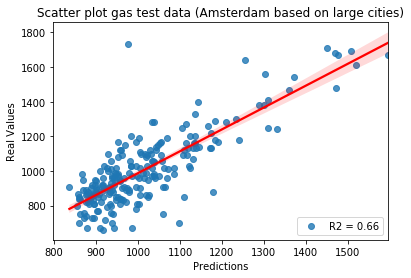

In [105]:
# plotting scatter plot gas
column1 = np.float64(bc2_ams_gas["prediction"])
column2 = np.float64(bc2_ams_gas["actual"])
plot_accuracy(column1,column2,'Scatter plot gas test data (Amsterdam based on large cities)', 'R2 = 0.66')

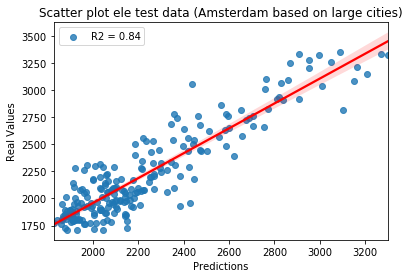

In [106]:
# plot scatter plot ele
plot_accuracy(np.float64(bc2_ams_ele["prediction"]),np.float64(bc2_ams_ele["actual"]),'Scatter plot ele test data (Amsterdam based on large cities)', 'R2 = 0.84')

# 9 Visualising data

In [113]:
# Making a dataframe with permutation importances of small-, medium- and big cities for gas use.
city_types_gas = perm_gas_sc.append([perm_gas_mc, perm_gas_bc], sort=True)


In [114]:
# Making a dataframe with permutation importances of small-, medium- and big cities for electricity use.
city_types_ele = perm_ele_sc.append([perm_ele_mc, perm_ele_bc], sort=True)


In [115]:
# Changing order of the columns so that they are grouped properly.
def change_order (df):
    df = df[['p_wat','bev_dich','FSI/FAR','p_leegsw','g_bjaar','p_label_a','p_tussw','p_hoek', 'p_2o1kap', 'p_vrijstd','p_mgezw', 'p_koopw','g_woz','p_soz_ww','p_nw_all', 'p_w_all', 'p_00_14', 'p_15_24', 'p_25_44', 'p_45_64','p_slim_m']]
    return df

# Change order of training permutation importance features for all city types combined in 1 radar chart (1 for gas 1 for electricity).
city_types_gas = change_order(city_types_gas)
city_types_ele = change_order(city_types_ele)

# Change order of training permutation importance features for all city types seperately (3 for gas and 3 for electricity).
perm_gas_sc = change_order(perm_gas_sc)
perm_gas_mc = change_order(perm_gas_mc)
perm_gas_bc = change_order(perm_gas_bc)
perm_ele_sc = change_order(perm_ele_sc)
perm_ele_mc = change_order(perm_ele_mc)
perm_ele_bc = change_order(perm_ele_bc)




In [116]:
# Creating a radar chart function.
# validate_list is a list of strings.
def radar_chart (df, plot_title, validate_list):
    
    categories = df.columns.tolist()
    # Adding the first column again at the back so that the chart has a start and ending.
    categories = [*categories, categories[0]]
    
    label_loc = np.linspace(start=0, stop=2 * np.pi, num=(len(df.iloc[0].tolist())+1))

    fig = plt.figure(figsize=(10, 10))
    plt.subplot(polar=True)
    
    for row in df.itertuples():
        info = row[1:]
        info = [*info, info[0]]
        # Adding the value of the first column again at the back so that the chart has a start and ending.
        plt.plot(label_loc, info, label=row[0])
    
    plt.title(plot_title, size=20)
    lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
    plt.legend()
    
    counter = 0.2
    for i in range(len(validate_list)):
        plt.figtext(1, counter, validate_list[i])
        counter += 0.18
    plt.show()
    return fig

In [117]:
# Creating lists of validation info.
city_types_val_gas = [gas_validate_sc, gas_validate_mc, gas_validate_bc]
city_types_val_ele = [ele_validate_sc, ele_validate_mc, ele_validate_bc]
sc_val_gas = [gas_validate_sc]
mc_val_gas = [gas_validate_mc]
bc_val_gas = [gas_validate_bc]
sc_val_ele = [ele_validate_sc]
mc_val_ele = [ele_validate_mc]
bc_val_ele = [ele_validate_bc]

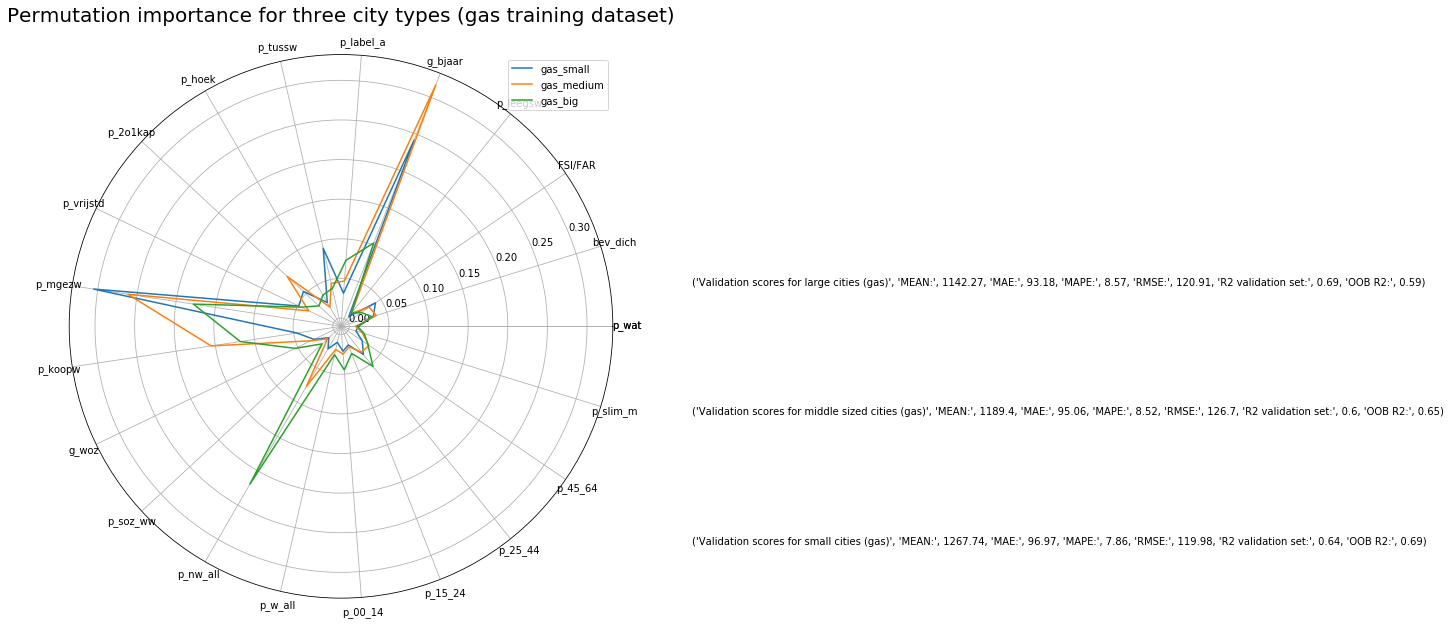

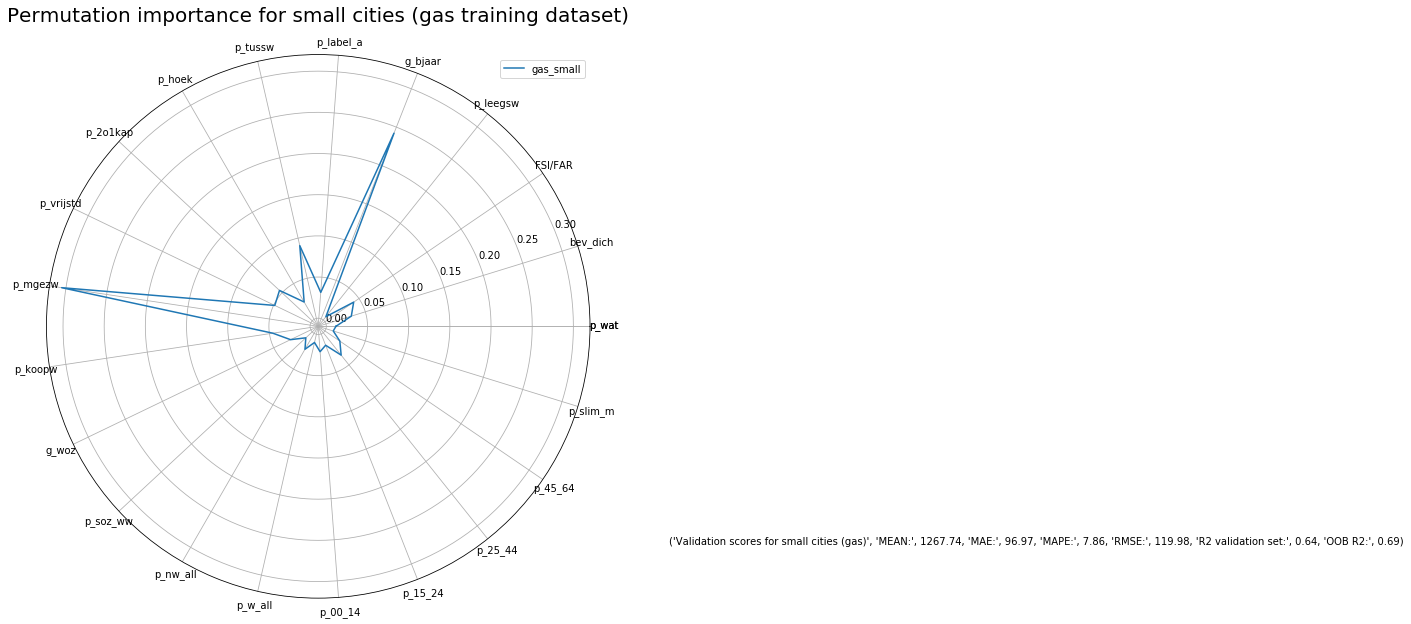

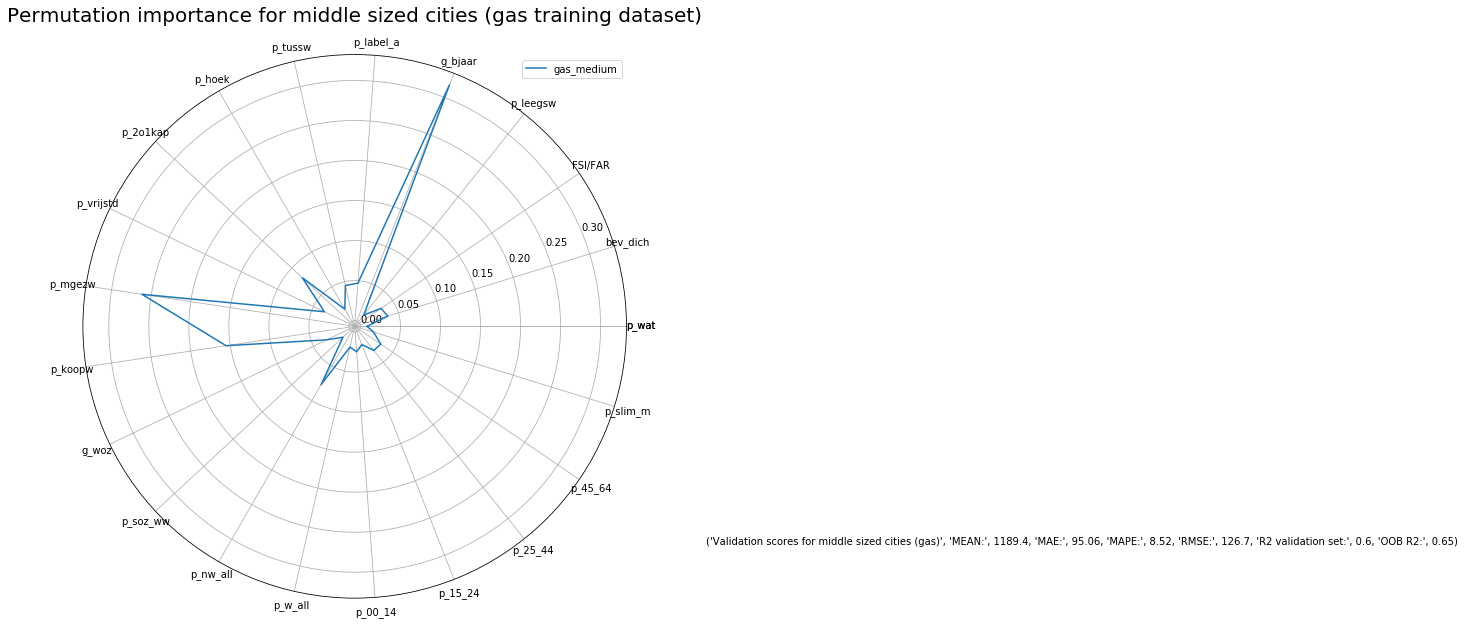

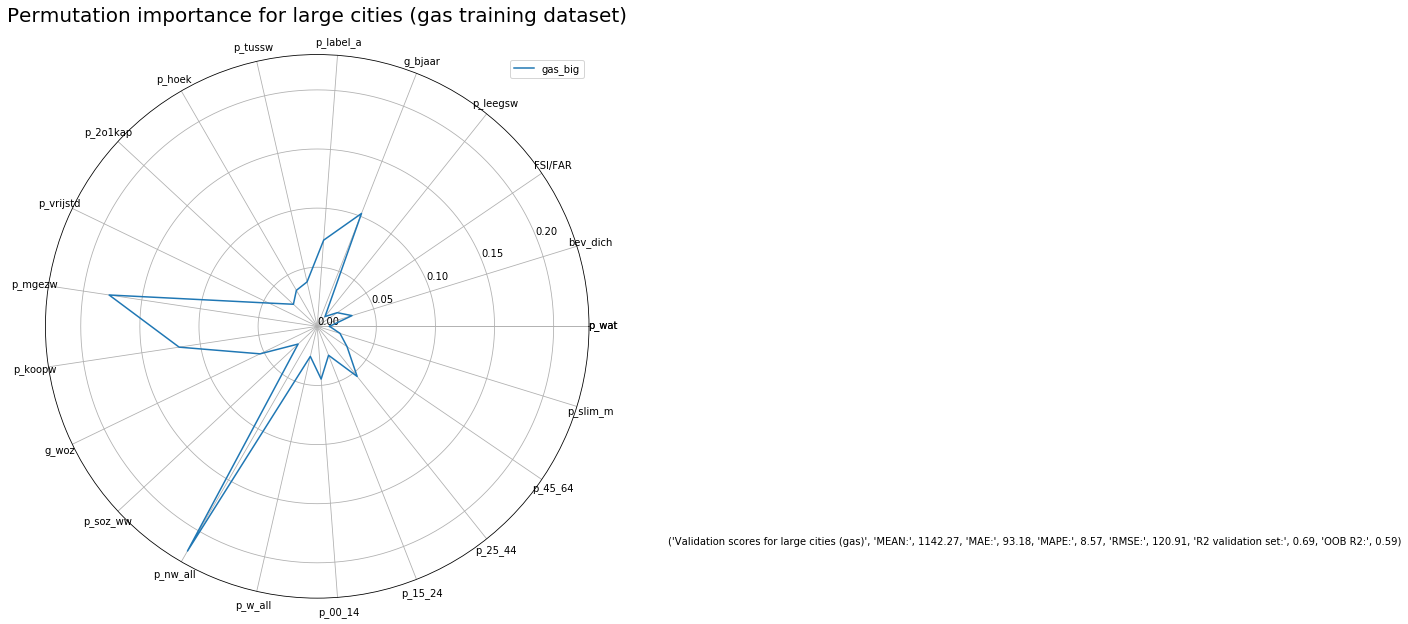

In [118]:
# Using the radar chart function to create a chart for comparing the city types' permutation importances for gas.
# Training set.
city_types_gas_plt = radar_chart(city_types_gas, 'Permutation importance for three city types (gas training dataset)', city_types_val_gas)
city_types_gas_plt.savefig(r'C:\Users\brand\Desktop\School\WUR\thesis\city_types_gas.png', transparent=True)

sc_gas_plt = radar_chart(perm_gas_sc, 'Permutation importance for small cities (gas training dataset)', sc_val_gas)
sc_gas_plt.savefig(r'C:\Users\brand\Desktop\School\WUR\thesis\sc_gas.png', transparent=True)

mc_gas_plt = radar_chart(perm_gas_mc, 'Permutation importance for middle sized cities (gas training dataset)', mc_val_gas)
mc_gas_plt.savefig(r'C:\Users\brand\Desktop\School\WUR\thesis\mc_gas.png', transparent=True)

bc_gas_plt = radar_chart(perm_gas_bc, 'Permutation importance for large cities (gas training dataset)', bc_val_gas)
bc_gas_plt.savefig(r'C:\Users\brand\Desktop\School\WUR\thesis\bc_gas.png', transparent=True)





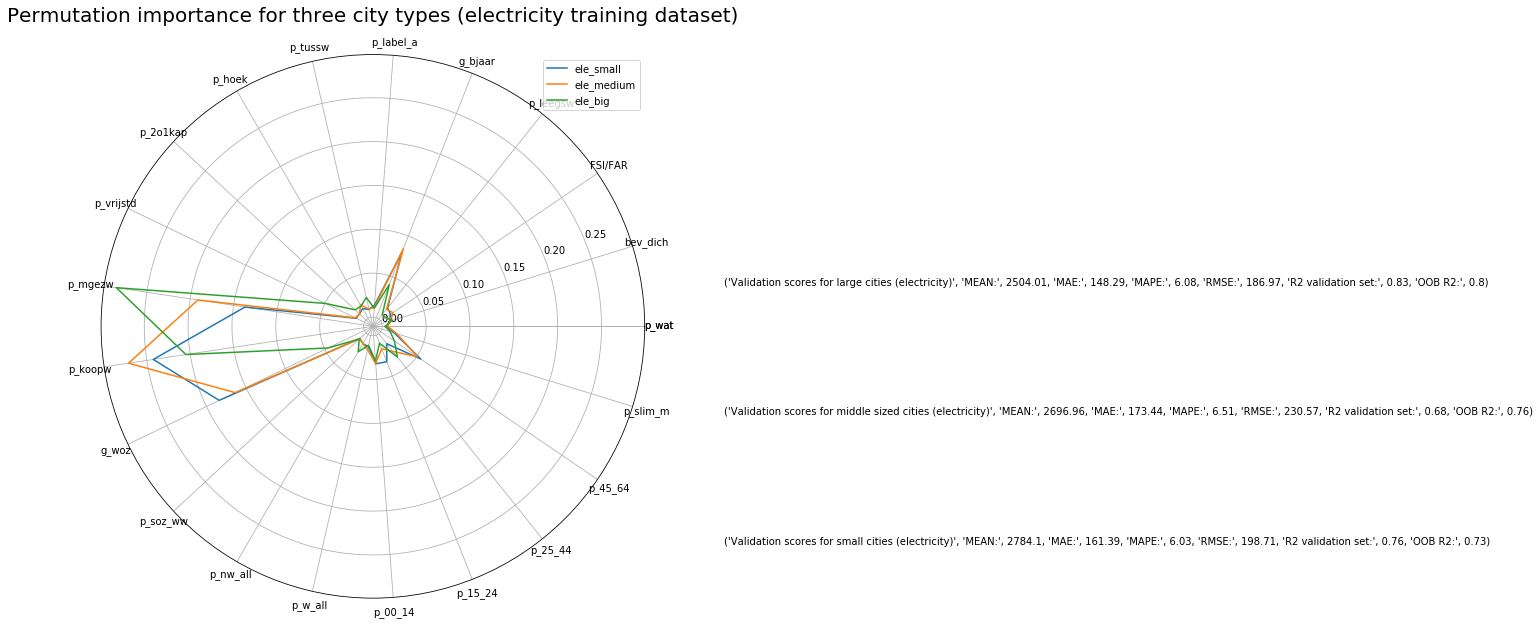

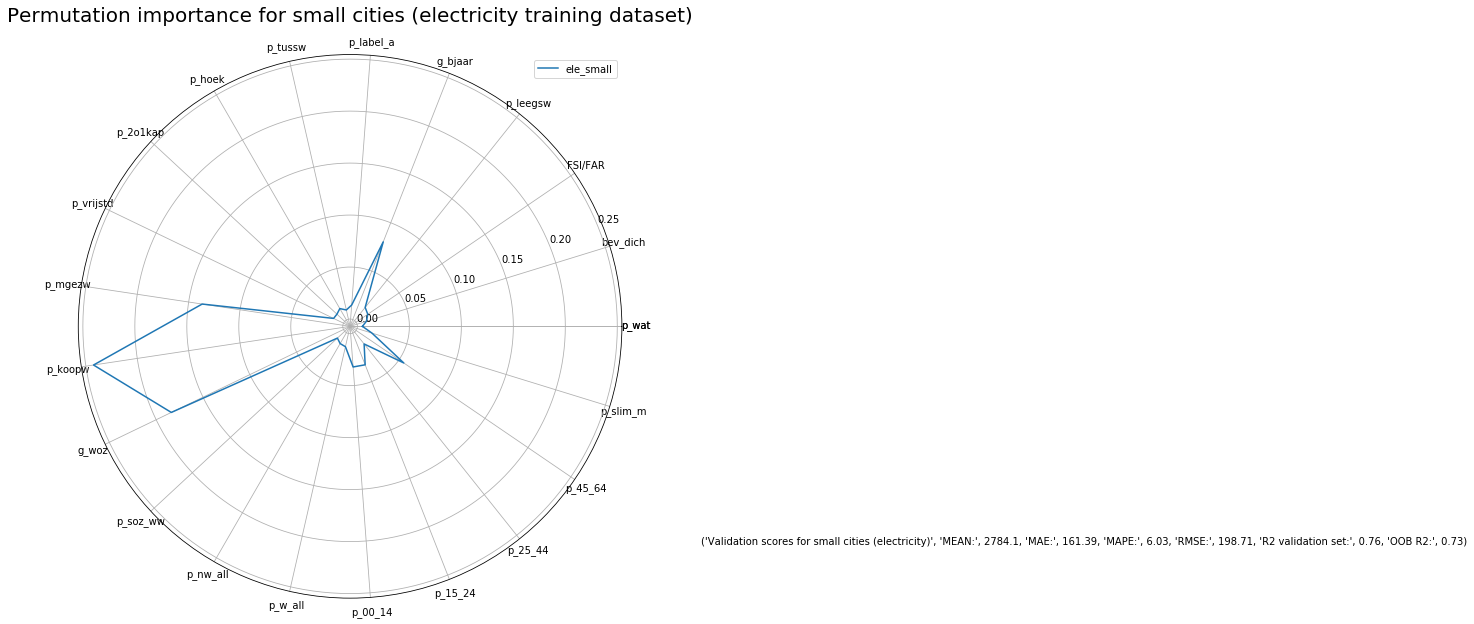

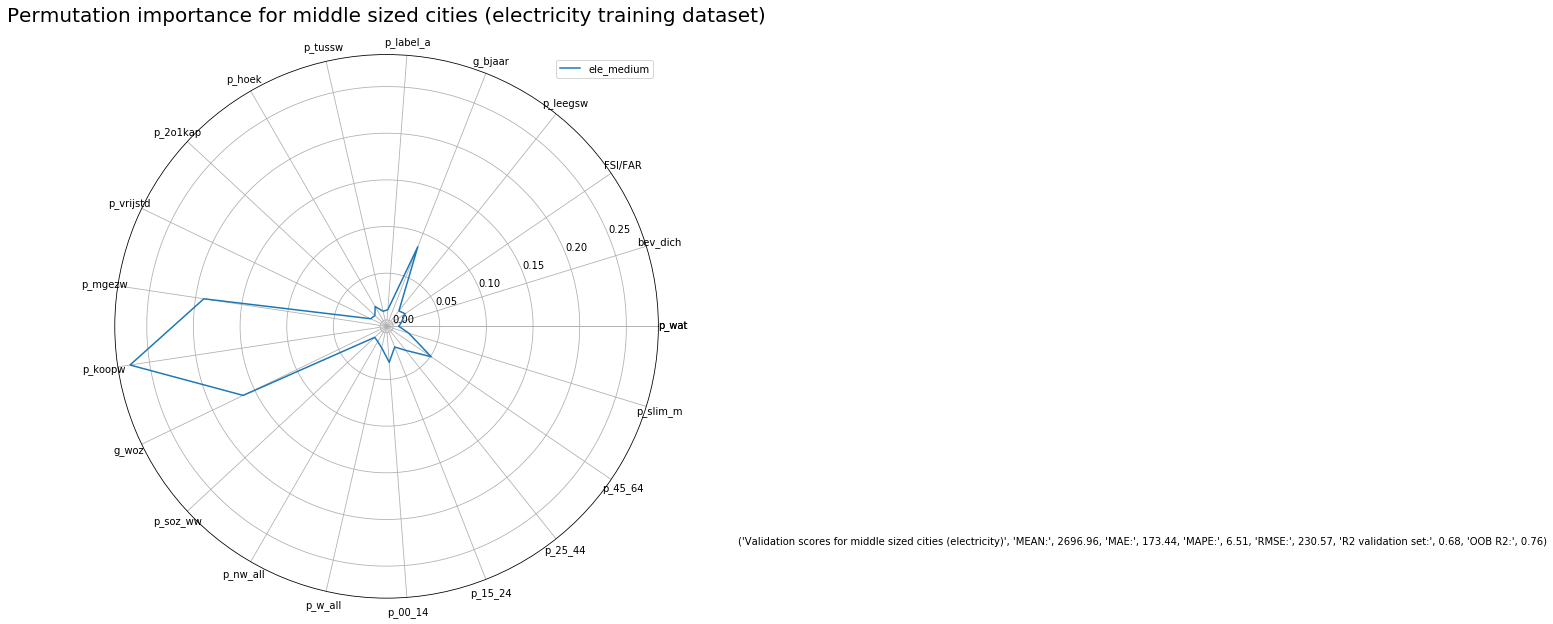

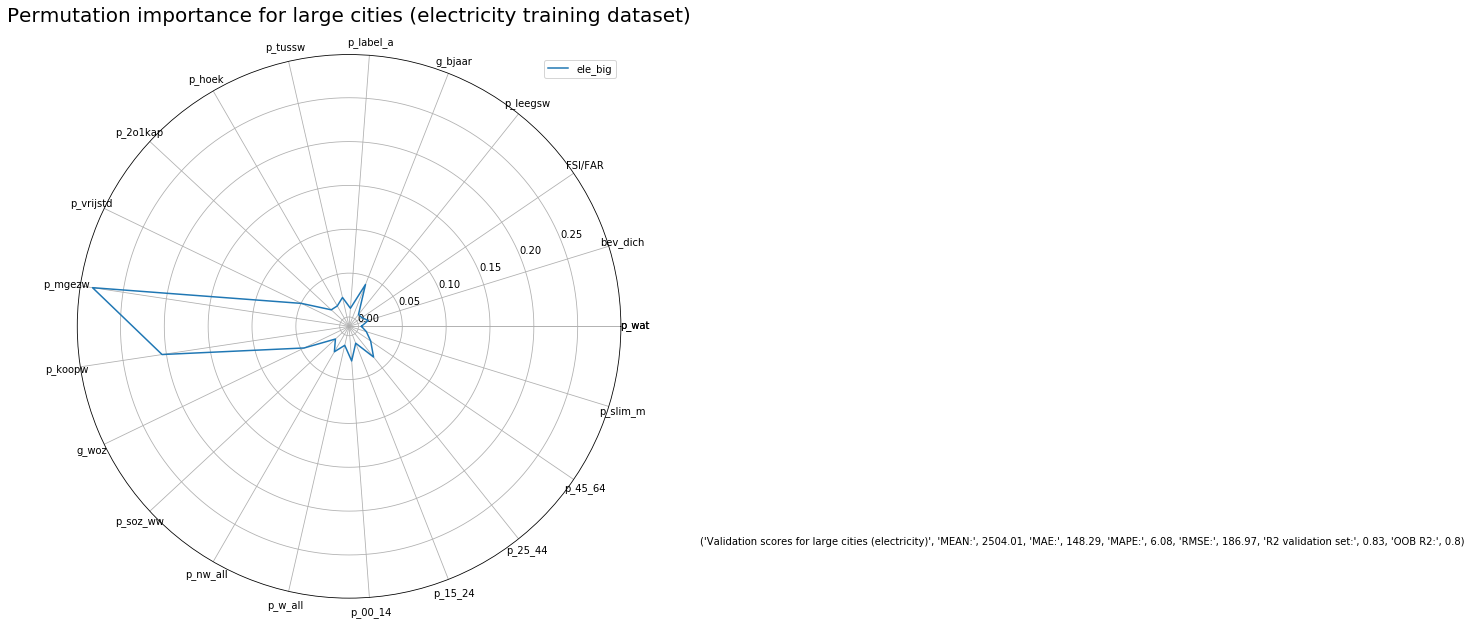

In [119]:
# Using the radar chart function to create a chart for comparing the city types' permutation importances for electricity.
# Training set.
city_types_ele_plt = radar_chart(city_types_ele, 'Permutation importance for three city types (electricity training dataset)', city_types_val_ele)
city_types_ele_plt.savefig(r'C:\Users\brand\Desktop\School\WUR\thesis\city_types_ele.png', transparent=True)

sc_ele_plt = radar_chart(perm_ele_sc, 'Permutation importance for small cities (electricity training dataset)', sc_val_ele)
sc_ele_plt.savefig(r'C:\Users\brand\Desktop\School\WUR\thesis\sc_ele.png', transparent=True)

mc_ele_plt = radar_chart(perm_ele_mc, 'Permutation importance for middle sized cities (electricity training dataset)', mc_val_ele)
mc_ele_plt.savefig(r'C:\Users\brand\Desktop\School\WUR\thesis\mc_ele.png', transparent=True)

bc_ele_plt = radar_chart(perm_ele_bc, 'Permutation importance for large cities (electricity training dataset)', bc_val_ele)
bc_ele_plt.savefig(r'C:\Users\brand\Desktop\School\WUR\thesis\bc_ele.png', transparent=True)



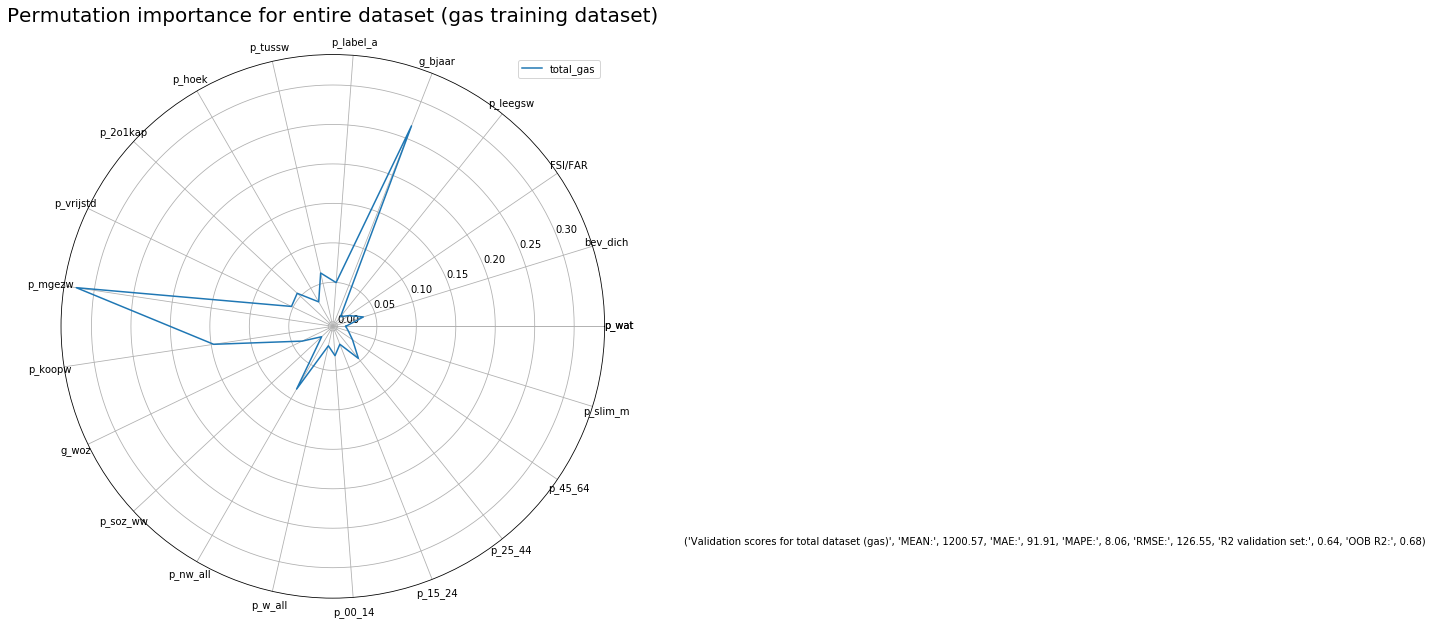

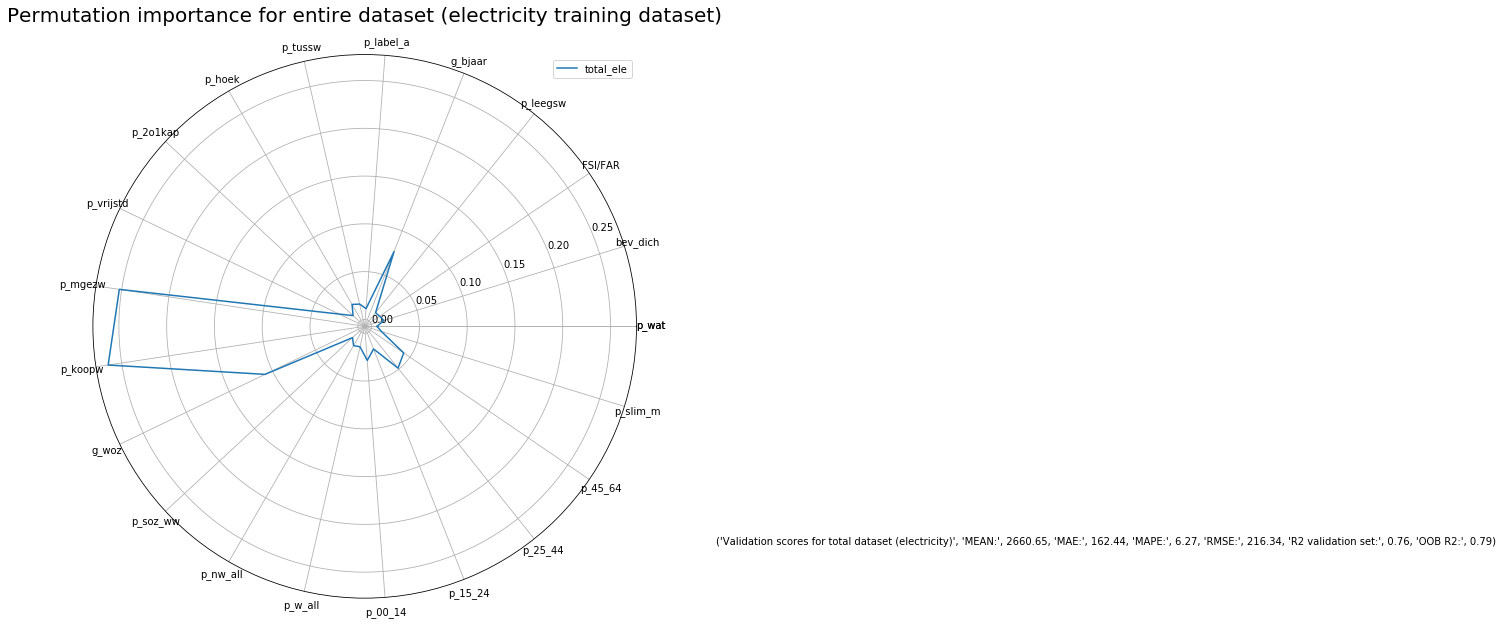

In [122]:
# For entire dataset
# Change order of features.
perm_gas = change_order(perm_gas)
perm_ele = change_order(perm_ele)

# Creating lists of validation info.
val_gas = [gas_validate]
# Creating lists of validation info.
val_ele = [ele_validate]
# Using the radar chart function to create a chart for comparing the city types' permutation importances for gas and electricity.

all_gas_plt = radar_chart(perm_gas, 'Permutation importance for entire dataset (gas training dataset)', val_gas)
all_gas_plt.savefig(r'C:\Users\brand\Desktop\School\WUR\thesis\gas_train_all.png', transparent=True)



all_ele_plt = radar_chart(perm_ele, 'Permutation importance for entire dataset (electricity training dataset)', val_ele)
all_ele_plt.savefig(r'C:\Users\brand\Desktop\School\WUR\thesis\ele_train_all.png', transparent=True)



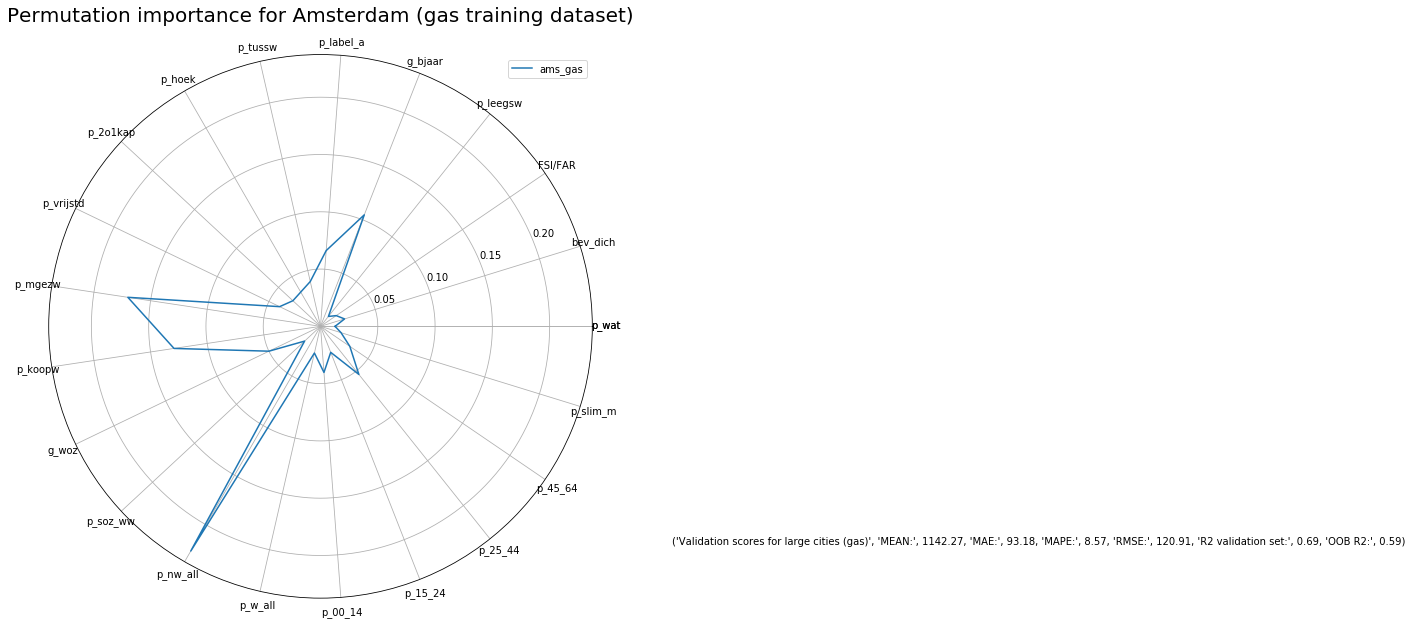

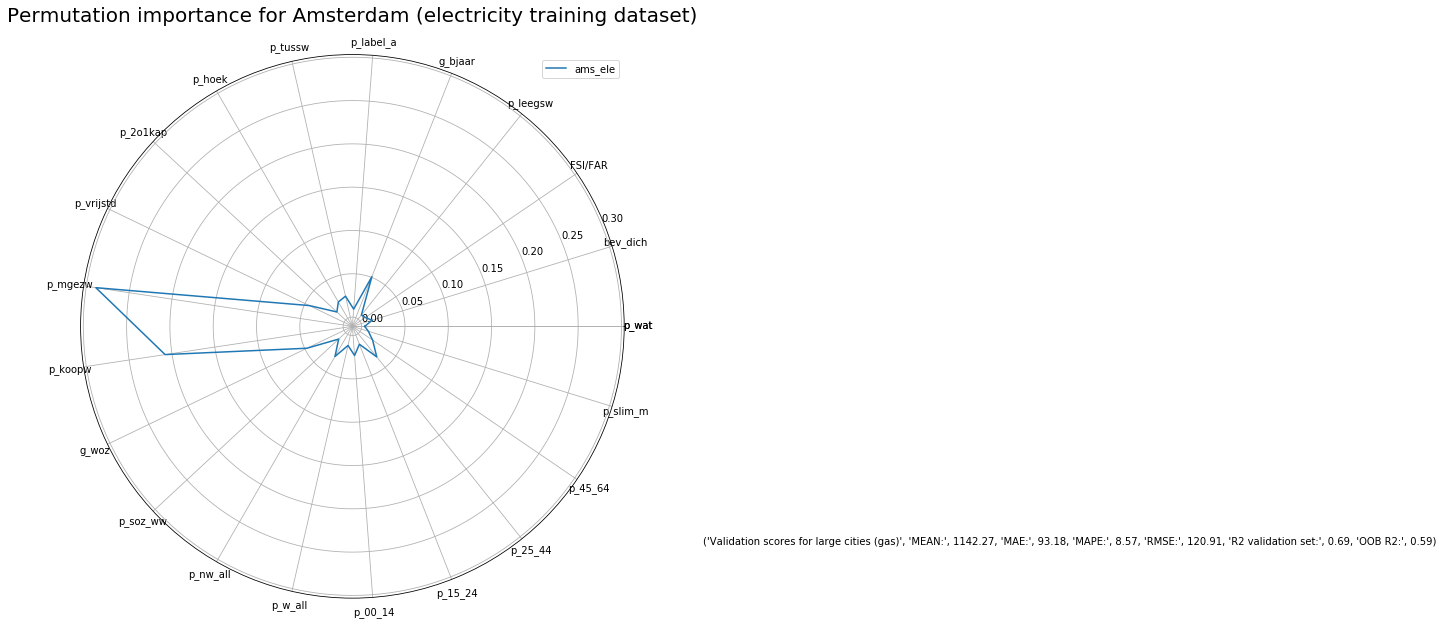

In [123]:
# radar charts for Amsterdam permutation
perm_gas_b2c = change_order(perm_gas_b2c)
perm_ele_bc2 = change_order(perm_ele_bc2)


bc2_gas_plt = radar_chart(perm_gas_b2c, 'Permutation importance for Amsterdam (gas training dataset)', bc_val_gas)
bc2_gas_plt.savefig(r'C:\Users\brand\Desktop\School\WUR\thesis\bc2_gas.png', transparent=True)



bc2_ele_plt = radar_chart(perm_ele_bc2, 'Permutation importance for Amsterdam (electricity training dataset)', bc_val_gas)
bc2_ele_plt.savefig(r'C:\Users\brand\Desktop\School\WUR\thesis\bc2_ele.png', transparent=True)



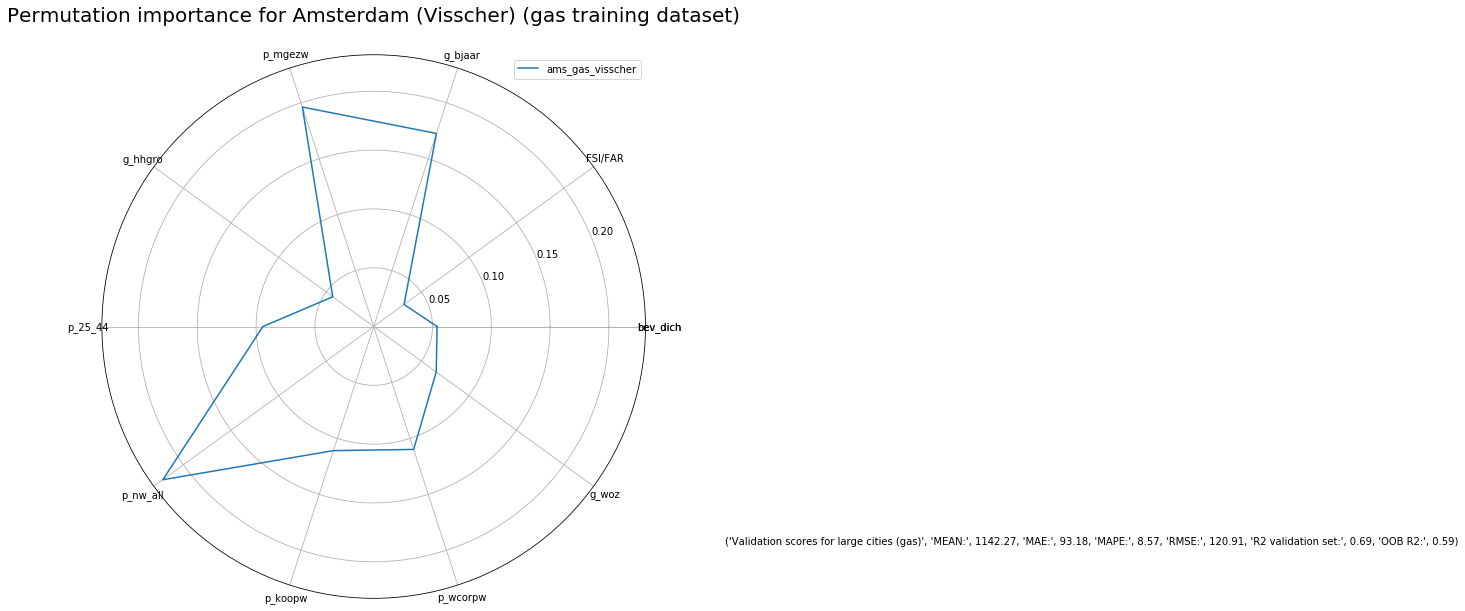

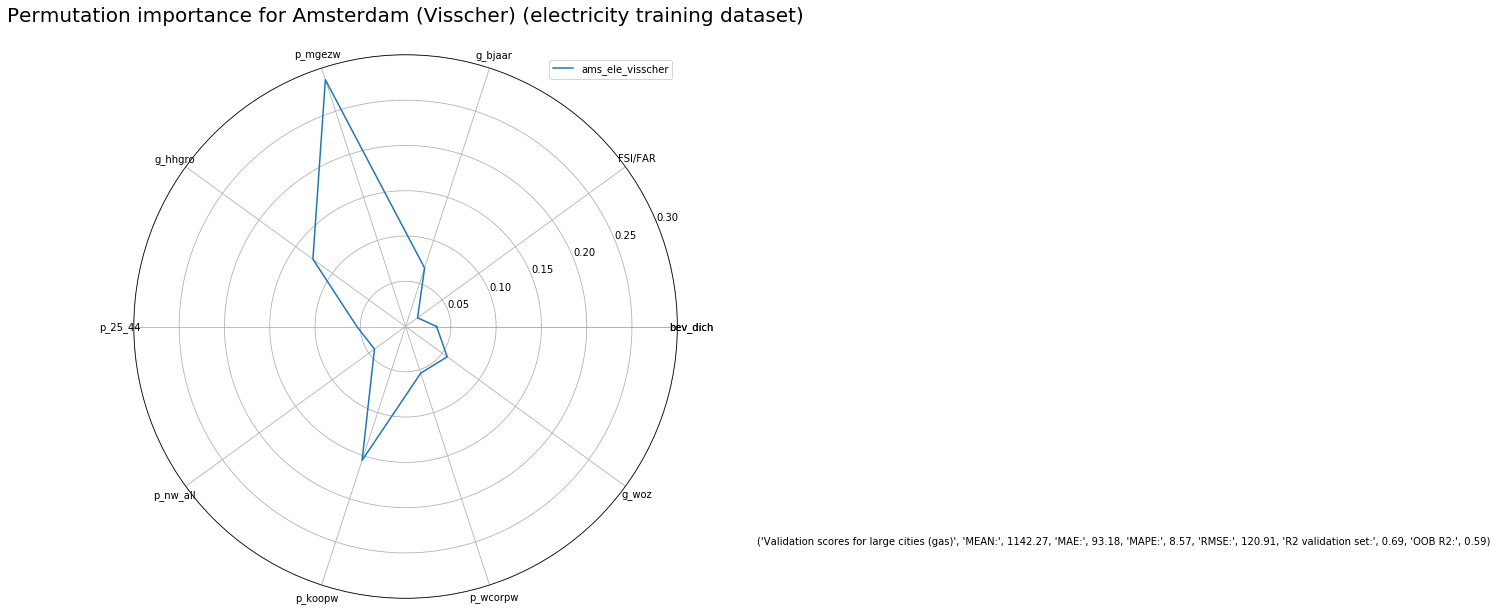

In [124]:
# radar charts for Amsterdam permutation
perm_gas_visscher = perm_gas_visscher[['bev_dich','FSI/FAR', 'g_bjaar','p_mgezw', 'g_hhgro', 'p_25_44','p_nw_all','p_koopw', 'p_wcorpw', 'g_woz']]
perm_ele_visscher = perm_ele_visscher[['bev_dich','FSI/FAR', 'g_bjaar','p_mgezw', 'g_hhgro', 'p_25_44','p_nw_all','p_koopw', 'p_wcorpw', 'g_woz']]


visscher_gas_plt = radar_chart(perm_gas_visscher, 'Permutation importance for Amsterdam (Visscher) (gas training dataset)', bc_val_gas)
visscher_gas_plt.savefig(r'C:\Users\brand\Desktop\School\WUR\thesis\vis_gas.png', transparent=True)



visscher_ele_plt = radar_chart(perm_ele_visscher, 'Permutation importance for Amsterdam (Visscher) (electricity training dataset)', bc_val_gas)
visscher_ele_plt.savefig(r'C:\Users\brand\Desktop\School\WUR\thesis\vis_ele.png', transparent=True)

